<hr style="height:5px;border-width:0;color:orange;background-color:green">
<center> <span style="font-size: 32px;"> Bob: Data Analysis Module </span>

<a id="0"></a>
<font color=green size=+3><b>0 - Module Summary</b></font>

This module will focus on the analysis of the data given by Easy Money with the main objective of understanding the current state of the company in terms of product performance, sales figures, demographics of the user base and other information that migh be valuable not only business wise but also for potential segmentation and recommendation machine learning models that might be built in the future. In order to do so each feature has been analyzed in depth individually and some of them also in combination with other features so to maximize the insight we can gain from a broad look at the data, several visualization (tabular and graphical) methods have been used for this purpose. The main results have been the identification of the best products in terms of customer acquisition and retention (EM accounts), the indentification of products with zero or very few customers (EM account +, EM account ++), the seasonality of customer acquisition, usually going from July to December of a given year together with the entry channels that were useful during the mentioned seasons (KHE, KHM, KHN). 

**Any other??**

<a id="0.1"></a>
<font color=green size=+2><b>0.1 - Data Assumptions</b></font>

<a id="0.2"></a>
<font color=green size=+2><b>0.2 - Import Libraries</b></font>

In [361]:
# Import libraries
import numpy as np # Library for numerical computations in Python
import pandas as pd # Library for data manipulation and analysis in Python

# Encoding
from sklearn import preprocessing # Library for preprocessing and scaling data in Python
from sklearn.preprocessing import LabelEncoder # Library for encoding categorical features as numerical values

# Data Visualization
import plotly.express as px # Library for interactive plotting in Python
from plotly.subplots import make_subplots # Library for creating subplots in Plotly
import plotly.graph_objects as go # Library for creating basic plotly charts
import seaborn as sns # Library for data visualization based on matplotlib
import matplotlib.pyplot as plt # Library for creating static visualizations in Python
import plotly.io as pio # Library for exporting plotly charts to various formats
import plotly.offline as pyo # Library for offline plotting of plotly charts

import datetime as dt # Library for working with dates and times in Python

import random
# Warnings 
import warnings # Library for managing warnings in Python
warnings.filterwarnings('ignore') # Ignore any warnings
warnings.warn("this will not show") # A warning that will not be displayed

# Pandas formatting
pd.set_option('display.max_rows', 100) # Set maximum number of rows to display in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set the floating point number format for display in Pandas
pd.set_option('max_colwidth',200) # Set maximum column width for display in Pandas
pd.set_option('display.colheader_justify', 'center') # Set the header alignment for display in Pandas

# Set notebook mode to work in offline
pyo.init_notebook_mode()

<a id="0.3"></a>
<font color=green size=+2><b>0.3 - User Functions</b></font>

In [362]:
# Categoriicals Unique values
def cat_uni_values(data):
    cat = data.select_dtypes(include=['object'])
    for columns in cat:
        categories = data[columns].unique()
        print('[{}] has {} unique values\n'.format(columns, categories))   

# Numerical
def numerical(data):
    num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
    
    print('The dataframe contains [{}] numerical features out of [{}] features:'.format(len(num),data.shape[1]))
    
    for columns in num:
        categories = len(data[columns].unique())
        print('Column [{}] has [{}] unique values'.format(columns, categories))
        
# Function for determining the number and percentages of missing values
def missing_values (data):
        missing_number = data.isnull().sum().sort_values(ascending=False)
        missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
        missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Percentage %'])
        return missing_values
    
def outliers(data):
    numeric_features = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
    for col in numeric_features:
        temp = data.copy()
        temp.dropna(axis = 0, subset = [col], inplace = True)
        mini, maxi = temp[col].min(), temp[col].max()
        Q1, Q3 = np.quantile(temp[col], 0.25), np.quantile(temp[col], 0.75)
        IQR = Q3 - Q1
        lower_range, upper_range = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
        outliers_upper = len(temp[temp[col] > upper_range])
        outliers_lower = len(temp[temp[col] < lower_range])
        print('df["{}"]'.format(col))
        print("Min: {}, Max: {}, Q1: {}, Q3: {}".format(mini, maxi, Q1, Q3))
        print("IQR: {}" .format(IQR))
        print("LOWER/UPPER Range: {} / {}" .format (lower_range, upper_range))
        print("Total LOWER/UPPER outliers: {} / {}\n".format (outliers_lower, outliers_upper))

<a id="1"></a>
<font color=green size=+3><b>1 - Data Understanding</b></font>

In [363]:
## read the data
df=pd.read_csv('Bobs_df.csv', index_col=0)

In [364]:
print('The dataset contains [{}] rows and [{}] columns.'.format(df.shape[0],df.shape[1]))

The dataset contains [5962924] rows and [27] columns.


Print the first 5 rows of data

In [365]:
df.head(5).T

0                   1                   2           \
pk_cid                        1375586             1050611             1050612   
pk_partition               2018-01-28          2018-01-28          2018-01-28   
country_id                         ES                  ES                  ES   
region_code                     29.00               13.00               13.00   
gender                              H                   V                   V   
age                                35                  23                  23   
deceased                            N                   N                   N   
salary                       87218.10            35548.74           122179.11   
short_term_deposit                  0                   0                   0   
loans                               0                   0                   0   
mortgage                            0                   0                   0   
funds                               0                   0                   0   
securities                          0                   0                   0   
long_term_deposit                   0                   0                   0   
em_account_pp                       0                   0                   0   
credit_card                         0                   0                   0   
payroll                          0.00                0.00                0.00   
pension_plan                     0.00                0.00                0.00   
payroll_account                     0                   0                   0   
emc_account                         0                   0                   0   
debit_card                          0                   0                   0   
em_account_p                        0                   0                   0   
em_acount                           1                   1                   1   
entry_date                 2018-01-12          2015-08-10          2015-08-10   
entry_channel                     KHL                 KHE                 KHE   
active_customer                  1.00                0.00                0.00   
segment             02 - PARTICULARES  03 - UNIVERSITARIO  03 - UNIVERSITARIO   

                            3                   4           
pk_cid                         1050613             1050614  
pk_partition                2018-01-28          2018-01-28  
country_id                          ES                  ES  
region_code                      50.00               50.00  
gender                               H                   V  
age                                 22                  23  
deceased                             N                   N  
salary                       119775.54                 NaN  
short_term_deposit                   1                   0  
loans                                0                   0  
mortgage                             0                   0  
funds                                0                   0  
securities                           0                   0  
long_term_deposit                    0                   0  
em_account_pp                        0                   0  
credit_card                          0                   0  
payroll                           0.00                0.00  
pension_plan                      0.00                0.00  
payroll_account                      0                   0  
emc_account                          0                   0  
debit_card                           0                   0  
em_account_p                         0                   0  
em_acount                            0                   1  
entry_date                  2015-08-10          2015-08-10  
entry_channel                      KHD                 KHE  
active_customer                   0.00                1.00  
segment             03 - UNIVERSITARIO  03 - UNIVERSITARIO

In [366]:
missing_values(df).head(8)

Missing_Number  Percentage %
salary             1512103        25.36    
segment             133944         2.25    
entry_channel       133033         2.23    
region_code           2264         0.04    
pension_plan            61         0.00    
payroll                 61         0.00    
gender                  25         0.00    
credit_card              0         0.00

### **How is the data organized ?**


Each row represents a month by customer, and each column represents a feature or attribute of the customer. 


### **Features**

In [367]:
# Create a dictionary with the feature names and descriptions
features = {"pk_cid": "Customer identifier","pk_partition": "Data ingestion date",
    "country_id": "Country of residence of the client","region_code": "Customer's province of residence (for ES)",
    "gender": "Gender","age": "Customer age","deceased": "Deceased index. N/S",
    "salary": "Household gross income","short_term_deposit": "Short-term deposits",
    "loans": "Loans","mortgage": "Mortgage", "funds": "Investment funds",
    "securities": "Securities","long_term_deposit": "Long term deposits",
    "em_account_pp": "easyMoney++ account","credit_card": "Credit cards",
    "payroll": "Payroll","pension_plan": "Pension plan",
    "payroll_account": "Account awarded with a bonus due to payroll",
    "emc_account": "easyMoney Crypto account","debit_card": "Debit card",
    "em_account_p": "easyMoney+ account", "em_acount": "easyMoney account",
    "entry_date": "Date on which first easyMoney contract was signed",
    "entry_channel": "Customer acquisition channel",
    "active_customer": "Client activity indicator in our application",
    "segment": "Customer business segment"
}
# Create a DataFrame from the dictionary
df_features = pd.DataFrame.from_dict(features, orient='index', columns=['Description'])

# Print the DataFrame
df_features

Description                    
pk_cid                                            Customer identifier
pk_partition                                      Data ingestion date
country_id                         Country of residence of the client
region_code                 Customer's province of residence (for ES)
gender                                                         Gender
age                                                      Customer age
deceased                                          Deceased index. N/S
salary                                         Household gross income
short_term_deposit                                Short-term deposits
loans                                                           Loans
mortgage                                                     Mortgage
funds                                                Investment funds
securities                                                 Securities
long_term_deposit                                  Long term deposits
em_account_pp                                     easyMoney++ account
credit_card                                              Credit cards
payroll                                                       Payroll
pension_plan                                             Pension plan
payroll_account           Account awarded with a bonus due to payroll
emc_account                                  easyMoney Crypto account
debit_card                                                 Debit card
em_account_p                                       easyMoney+ account
em_acount                                           easyMoney account
entry_date          Date on which first easyMoney contract was signed
entry_channel                            Customer acquisition channel
active_customer          Client activity indicator in our application
segment                                     Customer business segment

In [368]:
# Count the different types of features
df.dtypes.value_counts()

int64      15
object      7
float64     5
dtype: int64

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   country_id          object 
 3   region_code         float64
 4   gender              object 
 5   age                 int64  
 6   deceased            object 
 7   salary              float64
 8   short_term_deposit  int64  
 9   loans               int64  
 10  mortgage            int64  
 11  funds               int64  
 12  securities          int64  
 13  long_term_deposit   int64  
 14  em_account_pp       int64  
 15  credit_card         int64  
 16  payroll             float64
 17  pension_plan        float64
 18  payroll_account     int64  
 19  emc_account         int64  
 20  debit_card          int64  
 21  em_account_p        int64  
 22  em_acount           int64  
 23  entry_date          object 
 24  entry_channel       obje

#### **Transform the features**

Pension Plan and Payroll include missing values. We will input the missing values forward filling the missing values.

In [370]:
def fillna_ffill(df, feature):
    missing_data = df[df[feature].isnull()]['pk_cid'].unique().tolist()
    df_missing = df[df['pk_cid'].isin(missing_data)][['pk_cid', feature]].sort_values(by='pk_cid')
    df_missing[feature] = df_missing[feature].fillna(method='ffill')
    df.loc[df_missing.index, feature] = df_missing[feature]
    return df

In [371]:
fillna_ffill(df,'payroll')
fillna_ffill(df,'pension_plan')


pk_cid  pk_partition country_id  region_code gender  age deceased  \
0        1375586  2018-01-28      ES        29.00        H    35      N      
1        1050611  2018-01-28      ES        13.00        V    23      N      
2        1050612  2018-01-28      ES        13.00        V    23      N      
3        1050613  2018-01-28      ES        50.00        H    22      N      
4        1050614  2018-01-28      ES        50.00        V    23      N      
...          ...          ...        ...          ...    ...  ...      ...   
5962919  1166765  2019-05-28      ES        50.00        V    22      N      
5962920  1166764  2019-05-28      ES        26.00        V    23      N      
5962921  1166763  2019-05-28      ES        50.00        H    47      N      
5962922  1166789  2019-05-28      ES        50.00        H    22      N      
5962923  1550586  2019-05-28      ES        28.00        H    37      N      

          salary   short_term_deposit  loans  ...  pension_plan  \
0        87218.10           0            0    ...      0.00       
1        35548.74           0            0    ...      0.00       
2       122179.11           0            0    ...      0.00       
3       119775.54           1            0    ...      0.00       
4             NaN           0            0    ...      0.00       
...           ...                 ...    ...  ...           ...   
5962919  43912.17           0            0    ...      0.00       
5962920  23334.99           0            0    ...      0.00       
5962921       NaN           0            0    ...      0.00       
5962922 199592.82           0            0    ...      0.00       
5962923       NaN           0            0    ...      0.00       

         payroll_account  emc_account  debit_card  em_account_p  em_acount  \
0               0              0            0            0           1       
1               0              0            0            0           1       
2               0              0            0            0           1       
3               0              0            0            0           0       
4               0              0            0            0           1       
...                  ...          ...         ...           ...        ...   
5962919         0              0            0            0           1       
5962920         0              0            0            0           1       
5962921         0              0            0            0           1       
5962922         0              0            0            0           1       
5962923         0              0            0            0           1       

         entry_date  entry_channel  active_customer        segment       
0        2018-01-12       KHL            1.00         02 - PARTICULARES  
1        2015-08-10       KHE            0.00        03 - UNIVERSITARIO  
2        2015-08-10       KHE            0.00        03 - UNIVERSITARIO  
3        2015-08-10       KHD            0.00        03 - UNIVERSITARIO  
4        2015-08-10       KHE            1.00        03 - UNIVERSITARIO  
...             ...            ...              ...                 ...  
5962919  2016-08-14       KHE            0.00        03 - UNIVERSITARIO  
5962920  2016-08-14       KHE            0.00        03 - UNIVERSITARIO  
5962921  2016-08-14       KHE            1.00         02 - PARTICULARES  
5962922  2016-08-14       KHE            0.00        03 - UNIVERSITARIO  
5962923  2019-05-13       NaN            1.00                       NaN  

[5962924 rows x 27 columns]

In [372]:
df['payroll'] = df['payroll'].astype(int)
df['pension_plan'] = df['pension_plan'].astype(int)
df['active_customer'] = df['active_customer'].astype(int)

**Total_Products**

Create a feature to sum the total number of products per customer on a given month

In [373]:
products=['short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'debit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'em_account_p', 'em_acount','em_account_pp']
df['Total_products']=df[products].sum(axis=1)

**Dates**

Date features transform them to Datetime

In [374]:
# date column
df['pk_partition'] = pd.to_datetime(df['pk_partition'], format='%Y-%m-%d')
df['year_partition'] = df['pk_partition'].dt.year
df['month_partition'] = df['pk_partition'].dt.month
df['year_month_partition']=pd.to_datetime(df['pk_partition']).dt.to_period('M')


In [375]:
# Replace the invalid date of February 29 in the years 2015 and 2019 with February 28.
df['entry_date'] = df['entry_date'].replace('2015-02-29', '2015-02-28')
df['entry_date'] = df['entry_date'].replace('2019-02-29', '2019-02-28')

df['entry_date'] = pd.to_datetime(df['entry_date'], format='%Y-%m-%d')

In [376]:
df['quarter_entry'] = pd.to_datetime(df['entry_date']).dt.to_period('Q')
df['year_month_entry']=pd.to_datetime(df['entry_date']).dt.to_period('M')
df['year_month_entry']=df['year_month_entry'].dt.strftime('%Y-%m')
df['quarter_entry'] = df['quarter_entry'].dt.strftime('%Y-Q%q')

<a id="1.1"></a>
<font color=green size=+2><b>1.1 - Feature Understanding</b></font>

### **Entry_date**

In [377]:
df_unique = df.drop_duplicates(subset=['pk_cid'], keep='last')
df_unique.groupby("quarter_entry").agg({"pk_cid": "count"}).T


quarter_entry  2015-Q1  2015-Q2  2015-Q3  2015-Q4  2016-Q1  2016-Q2  2016-Q3  \
pk_cid          6338     7149     40758    38104    7140     6405     40114    

quarter_entry  2016-Q4  2017-Q1  2017-Q2  2017-Q3  2017-Q4  2018-Q1  2018-Q2  \
pk_cid          42933    11062    10170    45155    45975    12079    10149    

quarter_entry  2018-Q3  2018-Q4  2019-Q1  2019-Q2  
pk_cid          54576    50758    18590    8918

In [378]:
customers = {}
for year in range(2015, 2020):
    start = (year - 2015) * 4
    end = start + 4
    quarter_range = df_unique.groupby("quarter_entry").agg({"pk_cid": "count"}).iloc[start:end]
    customers[f"customers_{year}"] = quarter_range.sum()
    print(f"The number of registrations in {year} was {quarter_range.sum().iloc[0]}")

# print(customers)


The number of registrations in 2015 was 92349
The number of registrations in 2016 was 96592
The number of registrations in 2017 was 112362
The number of registrations in 2018 was 127562
The number of registrations in 2019 was 27508


<AxesSubplot: title={'center': 'Number of new registrations over time'}, xlabel='entry_date'>

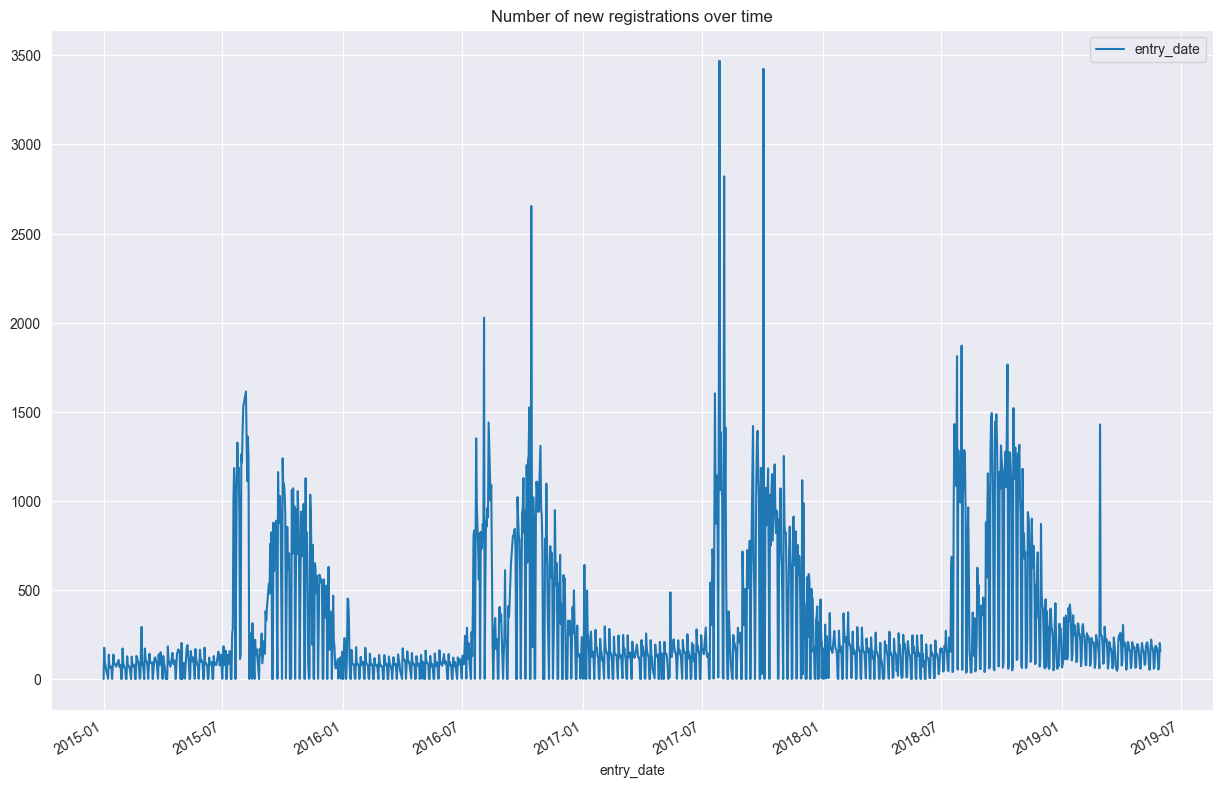

In [379]:
df_unique.groupby("entry_date").agg({"entry_date": "count"}).plot(figsize = (15, 10), title = "Number of new registrations over time")

As it can be seen in above plot, bulk customer acquisition seems to happen in well defined seasons that go from July up to December of each given year, with a peak around November. This seems to be true for all dates in our record, from 2015 to 2018, the data stops at 2019 July, just before what would be expected as a peak according to the past trend.

Another point that is worth highlighting is the fact that the absolute number of customers acquired during each one of the aforementioned seasons tends to increase as years pass.

It can be concluded that the strategies followed during the different years to acquire new customers have been a success, as the total number of new sign ups has been increasing for each year and actually happened each year. 

### **Pk_partition**

The PK partition represents the reporting date that reflects the current status of the data frame for a given month. By analyzing the number of customers reported in each partition, we can gain valuable insights into the distribution of data across different time periods.

Total Customers per month

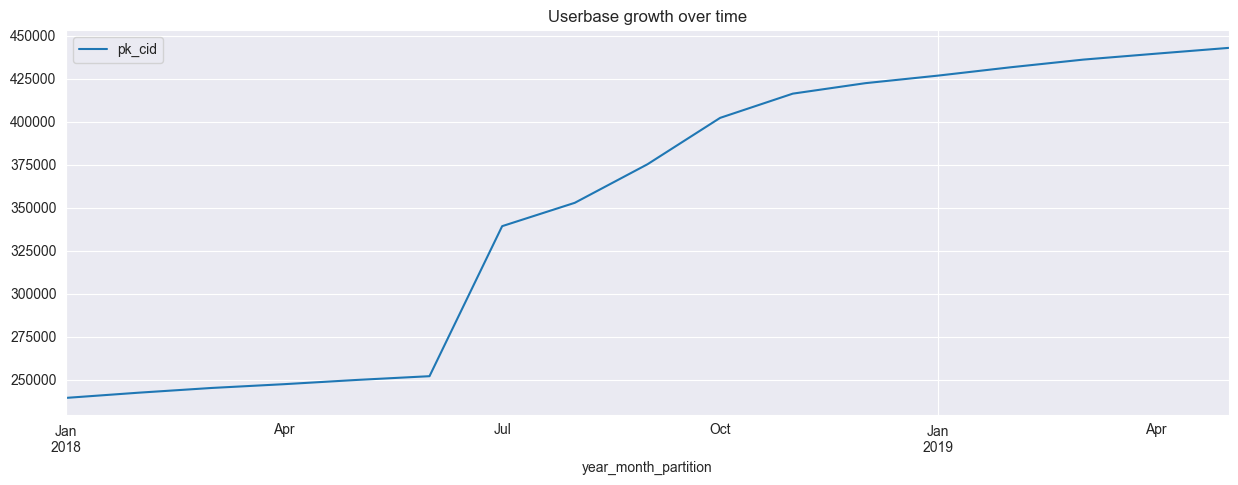

In [380]:
client_subset=pd.DataFrame(df['year_month_partition'].value_counts().sort_values(ascending=True))

client_subset.columns=['Total_Customers']

display(client_subset.T.style.background_gradient(axis=1))

df.groupby("year_month_partition").agg({"pk_cid": "count"}).plot(figsize = (15, 5), title = "Userbase growth over time");

From above graph it can be seen that the above seen seasons for customer acquisition have been successful not only at attracting new customers but also at keeping them.

Let's have a look at both graphs together, customer acquisition and retention from the first moment that we have both dates:

Reporting_Month  New_Customers
0       2018-01          2178    
1       2018-02          2509    
2       2018-03          2186    
3       2018-04          1903    
4       2018-05          1995    
5       2018-06          1872    
6       2018-07         16708    
7       2018-08         14378    
8       2018-09         23180    
9       2018-10         27985    
10      2018-11         15294    
11      2018-12          7295    
12      2019-01          6814    
13      2019-02          5873    
14      2019-03          5064    
15      2019-04          4452    
16      2019-05          4383

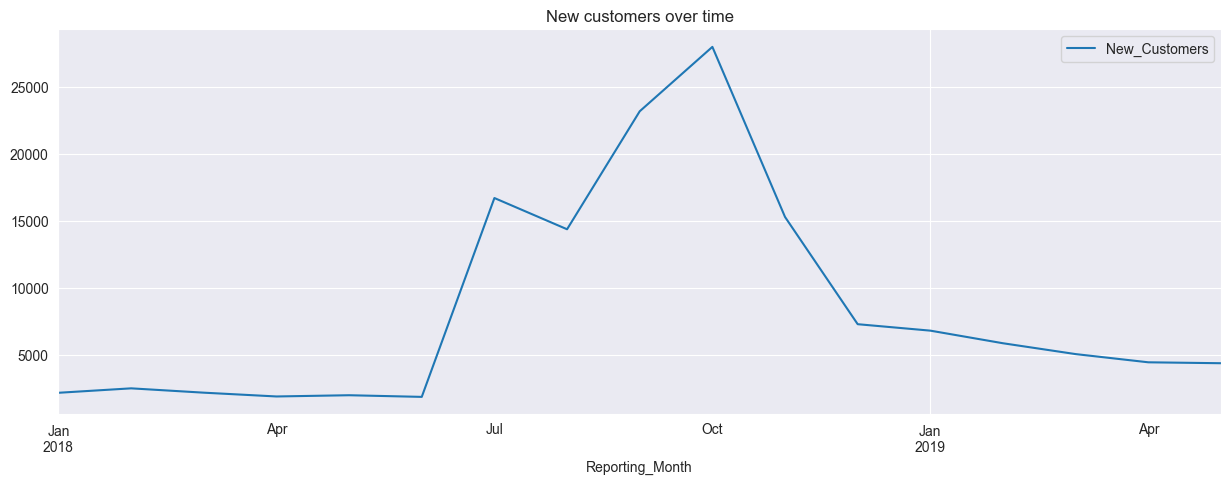

In [381]:
# Create a summary table of new customers per month
first_time_purchase_per_month = df[df['year_month_entry'] == df['year_month_partition']].groupby('year_month_partition')['pk_cid'].nunique().reset_index()
first_time_purchase_per_month.columns = ['Reporting_Month', 'New_Customers']

# Display the summary table
first_time_purchase_per_month.groupby("Reporting_Month").agg({"New_Customers": "sum"}).plot(figsize = (15, 5), title =  "New customers over time")
display(first_time_purchase_per_month)

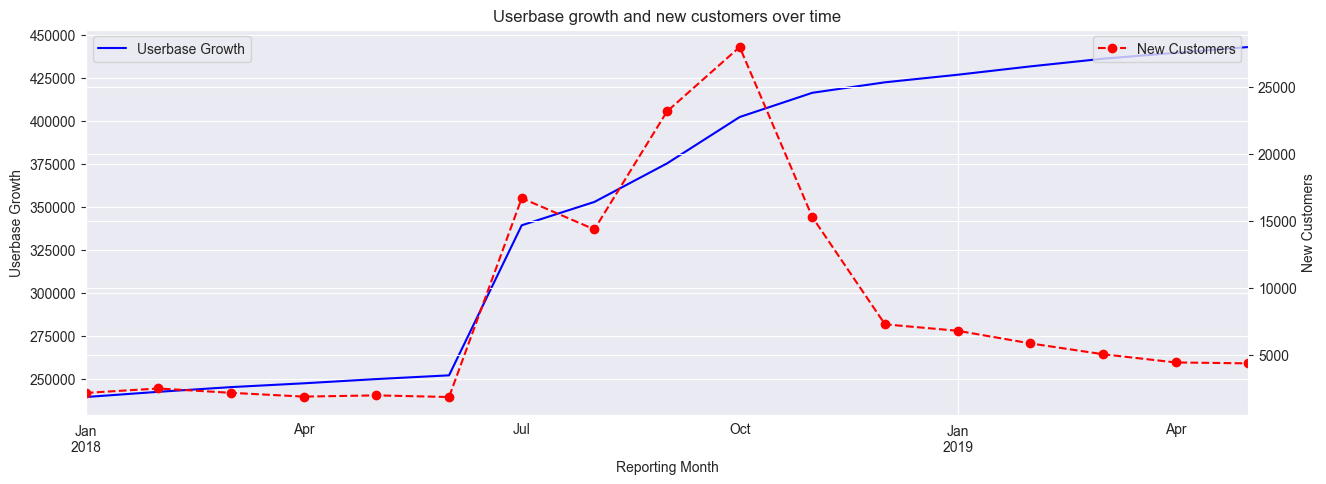

In [382]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot userbase growth over time
df.groupby("year_month_partition").agg({"pk_cid": "count"}).plot(ax=ax1, legend=False, color='blue')

# Set labels and title for ax1
ax1.set_xlabel('Reporting Month')
ax1.set_ylabel('Userbase Growth')
ax1.set_title('Userbase growth and new customers over time')

# Create a second axis object sharing the same x-axis with ax1
ax2 = ax1.twinx()

# Plot new customers per month on the same plot
first_time_purchase_per_month.groupby("Reporting_Month").agg({"New_Customers": "sum"}).plot(ax=ax2, legend=False, color='red', linestyle='--', marker='o')

# Set label for ax2
ax2.set_ylabel('New Customers')

# Add legends for both axes
ax1.legend(['Userbase Growth'], loc='upper left')
ax2.legend(['New Customers'], loc='upper right')

plt.show()


This graphs helps us understand that the retention of customers seems to be quite good: up until June the customer acquisition rate , the red line, is low (as it was for every year since records are available) to then start growing until the peak in October, from where it goes down to low acquisition rate again. The Userbase growth, blue line, shows that most of the users that a fair amount of the users that joined the company during this season stayed being clients, at least until the end of the available records. It is a pity that data of the activity of the company since the beginning of its operations is not available, as it would help to better visualize and understand the performance of the different waves of new registries.

#### **Total Active Customers By month**

Active customer == If the user is actively using the app.

* no necessary connection to active products
* It is assumed that this feature identifies the customer activity for a given month.

In [383]:
client_subset_active = pd.DataFrame(df[df['active_customer'] == 1]['year_month_partition'].value_counts().sort_values(ascending=True))
client_subset_active.columns = ['Total_Active_Customers']
client_subset_active['Percentage_of_Total_Customers'] = round((client_subset_active['Total_Active_Customers'] / df['year_month_partition'].value_counts() )* 100,2)
display(client_subset_active.T.style.background_gradient(axis=1))

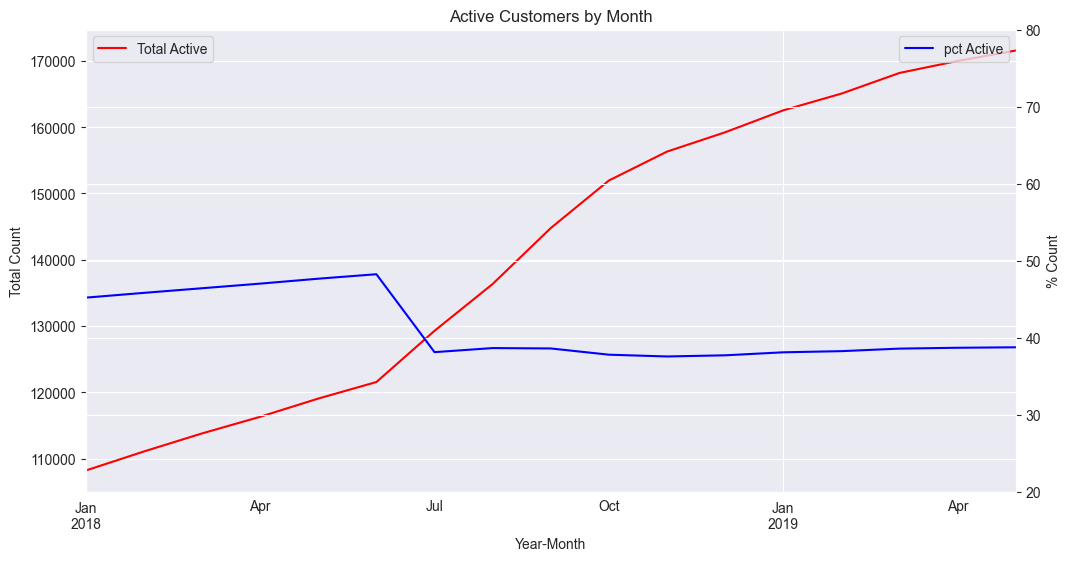

In [384]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot acquisition_df on first y-axis
client_subset_active.plot(ax=ax1, y='Total_Active_Customers', color='red', label='Total Active')

# create second y-axis
ax2 = ax1.twinx()

# plot df on second y-axis
client_subset_active.plot(ax=ax2, y='Percentage_of_Total_Customers', color='blue', label='pct Active')
ax2.set_ylim([20, 80]) 

# set titles and labels
ax1.set_title('Active Customers by Month')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Count')
ax2.set_ylabel('% Count')

# display legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

The first thing that can be noticed is the sharp decrease, of around a 10%, of active customers from June to July 2018. According to previously analyzed information, this specific period was very successful in terms of client acquisitions (entry date), meaning that during July 2018 a great amount of users downloaded the application but the total percentage of users that actually interacted with it decreased. From that point on, it remains relatively stable but it never goes up closer to previous values.

A clear conclusion is that even though the absolute number of users that are active in the application is steadily increasing, the overall engagement of the current clientbase with the application is stagnated and is lower than in previous periods. Have any changes in the app occurred during the mentioned key periods?

#### **Number of Months a customer is reported**

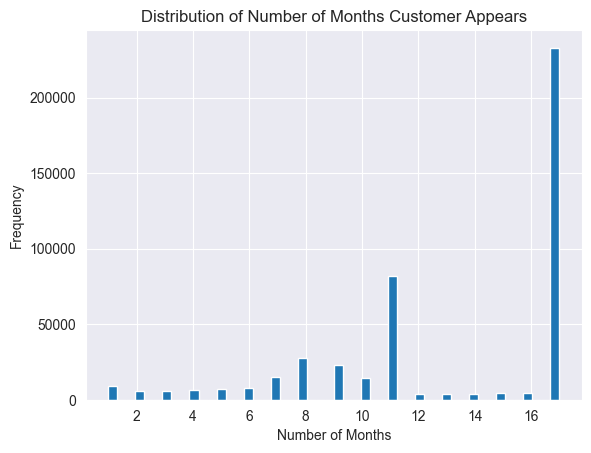

In [385]:
# Create a list of counts by pk_cid representing the number of months that customer appears
counts_by_customer = df.groupby(['pk_cid'])['year_month_partition'].nunique().sort_values(ascending=False)

plt.hist(counts_by_customer, bins=50)

# Set the title and axis labels
plt.title("Distribution of Number of Months Customer Appears")
plt.xlabel("Number of Months")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [386]:
counts_by_customer=counts_by_customer.reset_index()
# Print the result
print("Number of customers below 17 partitions:", (counts_by_customer['year_month_partition'] < 17).sum())
print("Number of customers with 17 partitions:", (counts_by_customer['year_month_partition']== 17).sum())

Number of customers below 17 partitions: 223399
Number of customers with 17 partitions: 232974


### **Country id**

In [387]:
display(df['country_id'].value_counts().head(10))

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
Name: country_id, dtype: int64

The majority of customers are from **Spain (5,960,672)**. The other countries have much lower numbers of customers, with the United Kingdom having the second-highest number (441), followed by France (225), Germany (199), the United States (195), Switzerland (194), Brazil (87), Belgium (81), Venezuela (79), and Ireland (68).

### **Region code**

In [388]:
# region code

df['region_code'].fillna(999, inplace=True)

In [389]:
# region code

regions={1:'Alava',
2:'Albacete',
3:'Alicante',
4:'Almeria',
5:'Avila',
6:'Badajoz',
7:'Baleares',
8:'Barcelona',
9:'Burgos',
10:'Caceres',
11:'Cadiz',
12:'Castellon',
13:'Ciudad Real',
14:'Cordoba',
15:'La Coruna',
16:'Cuenca',
17:'Gerona',
18:'Granada',
19:'Guadalajara',
20:'Guipuzcoa',
21:'Huelva',
22:'Huesca',
23:'Jaen',
24:'Leon',
25:'Lerida',
26:'La Rioja',
27:'Lugo',
28:'Madrid',
29:'Malaga',
30:'Murcia',
31:'Navarra',
32:'Orense',
33:'Asturias',
34:'Palencia',
35:'Las Palmas',
36:'Pontevedra',
37:'Salamanca',
38:'Santa Cruz de Tenerife',
39:'Cantabria',
40:'Segovia',
41:'Sevilla',
42:'Soria',
43:'Tarragona',
44:'Teruel',
45:'Toledo',
46:'Valencia',
47:'Valladolid',
48:'Vizcaya',
49:'Zamora',
50:'Zaragoza',
51:'Ceuta',
52:'Melilla',
999:'Not_available'}

In [390]:
df['region_code']=df['region_code'].map(regions)

In [391]:
df.groupby('pk_cid')['region_code'].first().value_counts().head(20)

Madrid        98179
Barcelona     46089
Valencia      27716
Murcia        21765
Sevilla       21311
La Coruna     18136
Malaga        13600
Alicante      13477
Pontevedra    12682
Cadiz         11752
Asturias      10138
Zaragoza       9947
Las Palmas     9490
Badajoz        8771
Valladolid     8398
Toledo         7803
Granada        7723
Salamanca      6595
Caceres        5836
Cordoba        5671
Name: region_code, dtype: int64

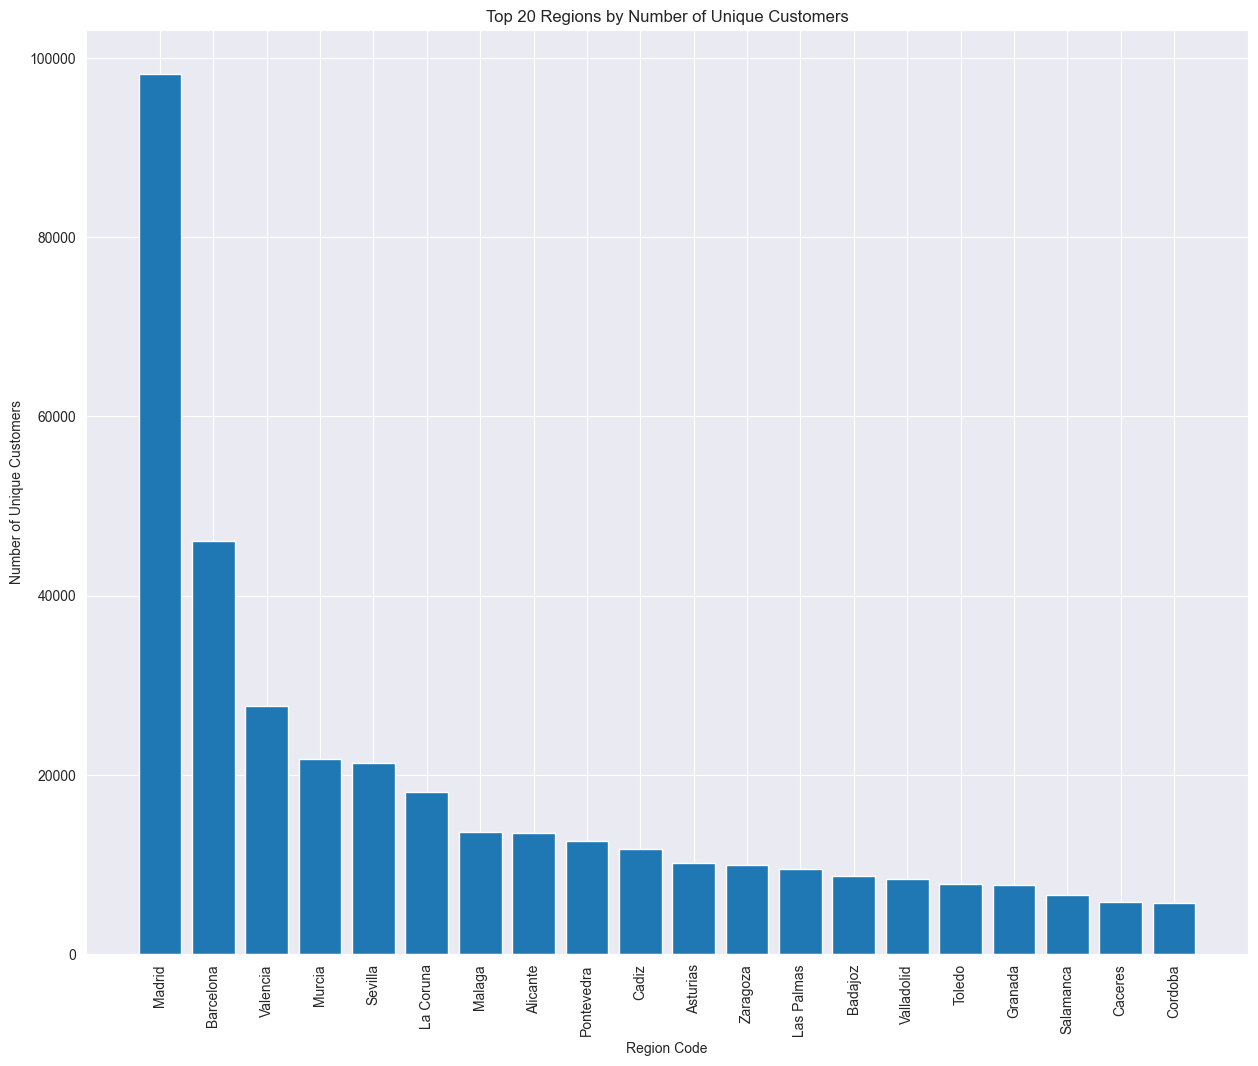

In [392]:
# Count the number of occurrences of each region code
region_counts = df.groupby('pk_cid')['region_code'].first().value_counts().head(20)
fig = plt.figure(figsize=(15, 12))
# Create a bar chart using Matplotlib
plt.bar(region_counts.index, region_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Region Code')
plt.ylabel('Number of Unique Customers')
plt.title('Top 20 Regions by Number of Unique Customers')

# Show the chart
plt.show()

Most of the customers are registered in Madrid, Barcelona and Valencia

### **Gender**

In [393]:
counts_gender=df.groupby(['pk_cid'])['gender'].nunique().sort_values(ascending=False).reset_index()

In [394]:
counts_gender

pk_cid   gender
0       1245873     2  
1       1408146     2  
2       1406504     2  
3       1409684     2  
4       1404082     2  
...         ...     ...
456368  1188532     1  
456369  1188531     1  
456370  1553689     1  
456371   216507     0  
456372   476023     0  

[456373 rows x 2 columns]

In [395]:

# Print the result
print("Number of customers with 2 genders:", (counts_gender['gender'] ==2).sum())
print("Number of customers with 0 genders:", (counts_gender['gender'] == 0).sum())


Number of customers with 2 genders: 41
Number of customers with 0 genders: 2


In [396]:
# Filter the counts_gender dataframe by gender == 2
gender_counts_2 = counts_gender[counts_gender['gender'] == 2]

# Create a dictionary with each customer and their two gender values
customers_gender_2_dict = {}
for pk_cid in gender_counts_2['pk_cid'].tolist():
    gender_values = df[df['pk_cid'] == pk_cid]['gender'].dropna().unique().tolist()
    customers_gender_2_dict[pk_cid] = gender_values

print(customers_gender_2_dict)

{1245873: ['H', 'V'], 1408146: ['H', 'V'], 1406504: ['H', 'V'], 1409684: ['H', 'V'], 1404082: ['H', 'V'], 1411849: ['H', 'V'], 1405745: ['H', 'V'], 1406375: ['H', 'V'], 1408093: ['V', 'H'], 1407978: ['H', 'V'], 1406009: ['H', 'V'], 1223219: ['V', 'H'], 1181078: ['H', 'V'], 1407631: ['V', 'H'], 1406939: ['H', 'V'], 1499273: ['V', 'H'], 1412152: ['H', 'V'], 1408159: ['H', 'V'], 1413102: ['H', 'V'], 1404792: ['H', 'V'], 1406177: ['H', 'V'], 1463211: ['V', 'H'], 1445017: ['V', 'H'], 1405500: ['H', 'V'], 1405499: ['H', 'V'], 1260638: ['H', 'V'], 1405600: ['H', 'V'], 1094303: ['H', 'V'], 1407077: ['H', 'V'], 1408121: ['H', 'V'], 1459058: ['H', 'V'], 1404884: ['H', 'V'], 1394848: ['H', 'V'], 1413034: ['H', 'V'], 1405868: ['H', 'V'], 1409286: ['H', 'V'], 1405976: ['H', 'V'], 1406383: ['H', 'V'], 1012963: ['V', 'H'], 1406101: ['H', 'V'], 1457392: ['V', 'H']}


In [397]:
cust_double_gender_list = list(customers_gender_2_dict.keys())

In [398]:

# Filter the df dataframe by customer IDs
filtered_df = df[df['pk_cid'].isin(cust_double_gender_list)]

# Sort the filtered dataframe by pk_partition and date to ensure the latest report for each customer is last
filtered_df = filtered_df.sort_values(by=['pk_cid', 'pk_partition'])

# Create a dictionary with the latest reported gender for each customer
latest_gender = {}
for customer in cust_double_gender_list:
    gender = filtered_df[filtered_df['pk_cid'] == customer]['gender'].iloc[-1]
    latest_gender[customer] = gender

print(latest_gender)

{1245873: 'V', 1408146: 'V', 1406504: 'V', 1409684: 'V', 1404082: 'V', 1411849: 'V', 1405745: 'V', 1406375: 'V', 1408093: 'H', 1407978: 'V', 1406009: 'V', 1223219: 'H', 1181078: 'V', 1407631: 'H', 1406939: 'V', 1499273: 'H', 1412152: 'V', 1408159: 'V', 1413102: 'V', 1404792: 'V', 1406177: 'V', 1463211: 'H', 1445017: 'H', 1405500: 'V', 1405499: 'V', 1260638: 'V', 1405600: 'V', 1094303: 'V', 1407077: 'V', 1408121: 'V', 1459058: 'V', 1404884: 'V', 1394848: 'V', 1413034: 'V', 1405868: 'V', 1409286: 'V', 1405976: 'V', 1406383: 'V', 1012963: 'H', 1406101: 'V', 1457392: 'H'}


In [399]:
# Loop through the keys and values in the latest_gender dictionary
for customer, gender in latest_gender.items():
    # Use boolean indexing to select the rows in df where pk_cid equals the current customer ID,
    # and set the gender value to the latest reported gender from the dictionary
    df.loc[df['pk_cid'] == customer, 'gender'] = gender

In [400]:
df['gender'].fillna('NA', inplace=True)
assert df['gender'].isna().sum() == 0

In [401]:
gender_na_list=df[df['gender']==99]['pk_cid'].unique().tolist()

In [402]:
df[df['pk_cid'].isin(gender_na_list)].groupby('pk_cid')['pk_partition'].count()

Series([], Name: pk_partition, dtype: int64)

In [403]:
df.groupby('pk_cid')['gender'].last().value_counts(normalize=True)

H    0.51
V    0.49
NA   0.00
Name: gender, dtype: float64

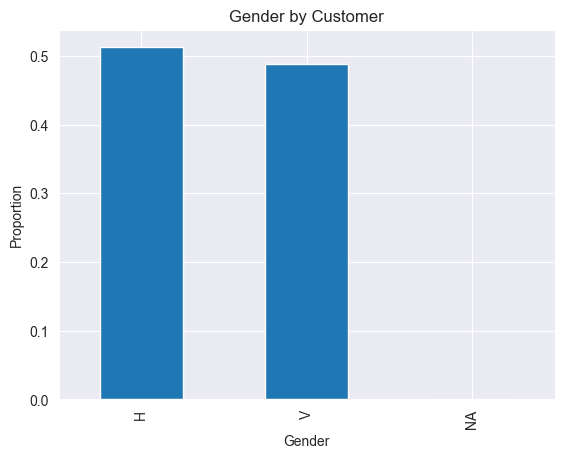

In [404]:
gender = df.groupby('pk_cid')['gender'].last().value_counts(normalize=True)

ax = gender.plot(kind='bar')

# Set the plot title and axis labels
ax.set_title('Gender by Customer')
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')

# Show the plot
plt.show()

As a surprise, the dataset included customers with two different reported genders. We have corrected this by replacing these instances with the latest reported gender for each customer. Additionally, we have replaced the missing gender values with "NA" to indicate that these values are not available.

### **Age**

In [405]:
count_ages=df.groupby('pk_cid')['age'].nunique().sort_values(ascending=False).reset_index()
count_ages.head(10)

pk_cid   age
0  1519642   4 
1  1519143   4 
2  1427987   3 
3  1439833   3 
4  1497191   3 
5  1438607   3 
6  1440910   3 
7  1308540   3 
8   794611   3 
9  1409179   3

In [406]:

# Print the result
print("Number of customers with 4 ages:", (count_ages['age'] ==4).sum())
print("Number of customers with 3 ages:", (count_ages['age'] == 3).sum())
print("Number of customers with 2 ages:", (count_ages['age'] == 2).sum())
print("Number of customers with 1 ages:", (count_ages['age'] == 1).sum())
print("Number of customers with 0 ages:", (count_ages['age'] == 0).sum())

Number of customers with 4 ages: 2
Number of customers with 3 ages: 172
Number of customers with 2 ages: 341568
Number of customers with 1 ages: 114631
Number of customers with 0 ages: 0


In [407]:
count_ages_more1=count_ages[count_ages['age']>=0]
list_age=count_ages_more1['pk_cid'].unique().tolist()

In [408]:
len(list_age)

456373

In [409]:
# Create a dictionary with the latest reported age for each customer
latest_age = df.groupby('pk_cid')['age'].max().to_dict()

In [410]:
df['age_corrected'] = df['pk_cid'].map(latest_age)

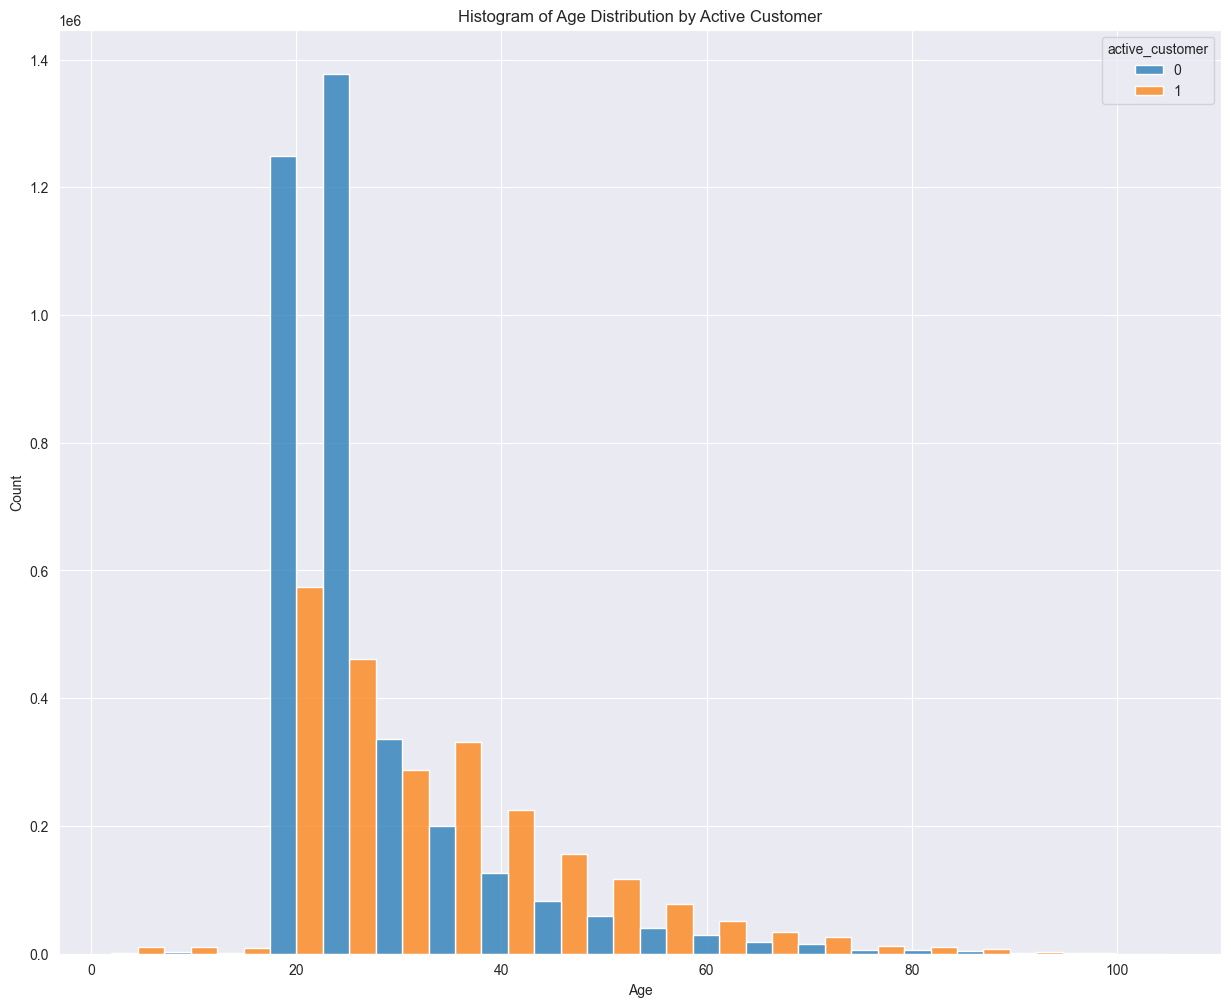

In [411]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.histplot(data=df, x='age', bins=20, hue='active_customer', multiple='dodge')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Distribution by Active Customer')
plt.show()

In [412]:
df_age_under20=df[df['age']<18]

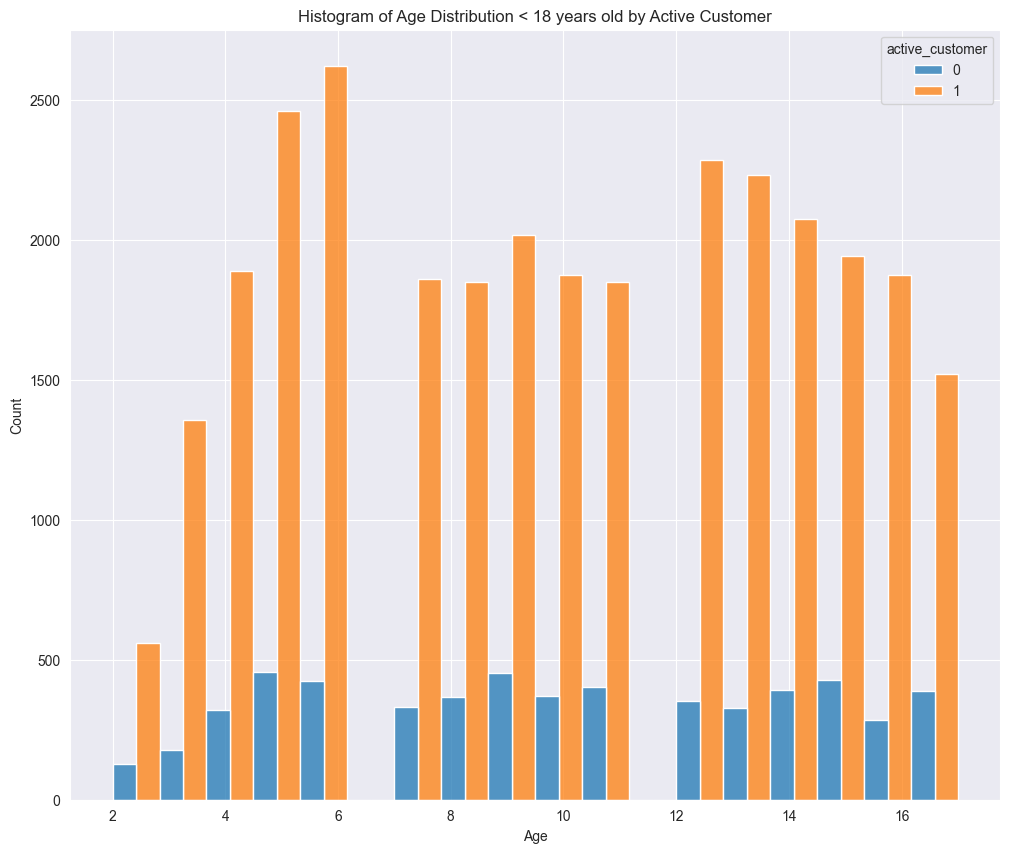

In [413]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(data=df_age_under20, x='age', bins=18, hue='active_customer', multiple='dodge')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Distribution < 18 years old by Active Customer')
plt.show()

In [414]:

df_age_under20.describe().T

count     mean        std       min       25%     \
pk_cid             35873.00 1213686.14 156535.64 153938.00 1094488.00   
age                35873.00       9.82      4.28      2.00       6.00   
salary             29001.00  151408.37 104127.12   4559.55   88120.71   
short_term_deposit 35873.00       0.00      0.00      0.00       0.00   
loans              35873.00       0.00      0.00      0.00       0.00   
mortgage           35873.00       0.00      0.00      0.00       0.00   
funds              35873.00       0.00      0.00      0.00       0.00   
securities         35873.00       0.00      0.00      0.00       0.00   
long_term_deposit  35873.00       0.00      0.00      0.00       0.00   
em_account_pp      35873.00       0.00      0.00      0.00       0.00   
credit_card        35873.00       0.00      0.00      0.00       0.00   
payroll            35873.00       0.00      0.01      0.00       0.00   
pension_plan       35873.00       0.01      0.07      0.00       0.00   
payroll_account    35873.00       0.00      0.00      0.00       0.00   
emc_account        35873.00       0.00      0.00      0.00       0.00   
debit_card         35873.00       0.00      0.00      0.00       0.00   
em_account_p       35873.00       0.00      0.00      0.00       0.00   
em_acount          35873.00       0.00      0.04      0.00       0.00   
active_customer    35873.00       0.84      0.36      0.00       1.00   
Total_products     35873.00       0.01      0.08      0.00       0.00   
year_partition     35873.00    2018.36      0.48   2018.00    2018.00   
month_partition    35873.00       5.60      3.45      1.00       3.00   
age_corrected      35873.00      10.37      4.36      2.00       7.00   

                       50%        75%        max     
pk_cid             1178907.00 1366151.00 1553550.00  
age                     10.00      13.00      17.00  
salary              126762.48  186181.65 1344774.18  
short_term_deposit       0.00       0.00       0.00  
loans                    0.00       0.00       0.00  
mortgage                 0.00       0.00       0.00  
funds                    0.00       0.00       0.00  
securities               0.00       0.00       0.00  
long_term_deposit        0.00       0.00       0.00  
em_account_pp            0.00       0.00       0.00  
credit_card              0.00       0.00       0.00  
payroll                  0.00       0.00       1.00  
pension_plan             0.00       0.00       1.00  
payroll_account          0.00       0.00       0.00  
emc_account              0.00       0.00       0.00  
debit_card               0.00       0.00       0.00  
em_account_p             0.00       0.00       0.00  
em_acount                0.00       0.00       1.00  
active_customer          1.00       1.00       1.00  
Total_products           0.00       0.00       2.00  
year_partition        2018.00    2019.00    2019.00  
month_partition          5.00       9.00      12.00  
age_corrected           10.00      14.00      69.00

In [415]:
len(df_age_under20['pk_cid'].unique())

2806

There are 2806 customers from the whole database which are under 18, with ages from 2 to 17 years old. In the table above, it can be seen that even though they are present and seem active in the application they do not have any product other than em account, payroll or pension plan and it is only a few of them who have these products.

Since it is very likely that these accounts are maybe set up by their parents for future use or something in similar fashion, they won't be targeted as potential buyers so they will be dropped from the dataset to avoid confusion.

In [416]:
_drop_under18 = df_age_under20['pk_cid'].unique()
print(df[df['pk_cid'].isin(_drop_under18)].shape)
print(df.shape)

(36378, 34)
(5962924, 34)


In [417]:
df.set_index('pk_cid', inplace=True)
df.drop(_drop_under18, inplace=True)
df.reset_index(inplace=True)
df.shape


(5926546, 34)

In [418]:
df['age'].describe()

count   5926546.00
mean         29.88
std          11.91
min          18.00
25%          22.00
50%          25.00
75%          34.00
max         105.00
Name: age, dtype: float64

The age feature in our data presented some inconsistencies, such as customers with multiple ages. To address this issue, they have been corrected by applying the latest known age for each customer. Furthermore, as seen above, all ages below 18 have been dropped as these ages do not hold any meaningful information in the context of our analysis and these users will not be targets of our recommendations.

This approach will help us to better understand the age distribution of our customers and ensure that our analysis is based on accurate and consistent data. However, we acknowledge that this approach may have limitations and that other methods could be used to address inconsistencies in the age feature, depending on the specific context and goals of the analysis.

### **Deceased**

In [419]:
df.groupby('deceased')['active_customer'].value_counts()

deceased  active_customer
N         0                  3551472
          1                  2373999
S         1                      718
          0                      357
Name: active_customer, dtype: int64

In [420]:
count_deceased=df.groupby('pk_cid')['deceased'].nunique().sort_values(ascending=False).reset_index()
count_deceased.head(10)
list_deceased=count_deceased['pk_cid'].unique()

In [421]:
df[df['pk_cid'].isin(list_deceased)].head(10)

pk_cid  pk_partition country_id region_code  gender  age deceased  \
0  1375586  2018-01-28      ES           Malaga    H    35      N      
1  1050611  2018-01-28      ES      Ciudad Real    V    23      N      
2  1050612  2018-01-28      ES      Ciudad Real    V    23      N      
3  1050613  2018-01-28      ES         Zaragoza    H    22      N      
4  1050614  2018-01-28      ES         Zaragoza    V    23      N      
5  1050615  2018-01-28      ES           Toledo    H    23      N      
6  1050616  2018-01-28      ES             Leon    H    23      N      
7  1050617  2018-01-28      ES         Zaragoza    H    23      N      
8  1050619  2018-01-28      ES        Guipuzcoa    H    24      N      
9  1050620  2018-01-28      ES          Caceres    H    23      N      

    salary   short_term_deposit  loans  ...  entry_channel  active_customer  \
0  87218.10           0            0    ...       KHL              1          
1  35548.74           0            0    ...       KHE              0          
2 122179.11           0            0    ...       KHE              0          
3 119775.54           1            0    ...       KHD              0          
4       NaN           0            0    ...       KHE              1          
5  22220.04           0            0    ...       KHE              0          
6 295590.36           0            0    ...       KHE              0          
7 113316.66           0            0    ...       KHE              1          
8       NaN           0            0    ...       KHE              0          
9 113194.98           0            0    ...       KHE              0          

         segment       Total_products  year_partition  month_partition  \
0   02 - PARTICULARES         1             2018              1          
1  03 - UNIVERSITARIO         1             2018              1          
2  03 - UNIVERSITARIO         1             2018              1          
3  03 - UNIVERSITARIO         1             2018              1          
4  03 - UNIVERSITARIO         1             2018              1          
5  03 - UNIVERSITARIO         1             2018              1          
6  03 - UNIVERSITARIO         1             2018              1          
7  03 - UNIVERSITARIO         1             2018              1          
8  03 - UNIVERSITARIO         1             2018              1          
9  03 - UNIVERSITARIO         1             2018              1          

   year_month_partition  quarter_entry  year_month_entry  age_corrected  
0         2018-01           2018-Q1          2018-01           36        
1         2018-01           2015-Q3          2015-08           24        
2         2018-01           2015-Q3          2015-08           23        
3         2018-01           2015-Q3          2015-08           23        
4         2018-01           2015-Q3          2015-08           24        
5         2018-01           2015-Q3          2015-08           24        
6         2018-01           2015-Q3          2015-08           24        
7         2018-01           2015-Q3          2015-08           23        
8         2018-01           2015-Q3          2015-08           25        
9         2018-01           2015-Q3          2015-08           24        

[10 rows x 34 columns]

In [422]:
print(df['deceased'].unique())

['N' 'S']


In [423]:
df.shape

(5926546, 34)

In [424]:
# filter the customers you want to delete based on deceased status
deceased_customers = df[df['deceased'] == 'S']
# get a list of customer IDs to delete
customer_ids_to_delete = deceased_customers['pk_cid'].tolist()

# delete the rows with the specified customer IDs from the data frame
df = df[~df['pk_cid'].isin(customer_ids_to_delete)]

In [425]:
print(df['deceased'].unique())

['N']


The deceased feature in our data includes customers who passed away in a certain month, but remained active and continued to hold their products. While this may not be justifiable, we have decided to avoid any potential data conflicts by only deleting the rows where a customer is marked as deceased.

This approach will allow us to retain the remaining months of data for analysis while ensuring that our results are not affected by any inconsistencies in the deceased feature. 

### **Salary**

In [426]:
count_salary=df.groupby('pk_cid')['salary'].nunique().sort_values(ascending=False).reset_index()
count_salary.head(10)

pk_cid   salary
0  1230008     1  
1  1261527     1  
2  1261523     1  
3  1261522     1  
4  1261521     1  
5  1261519     1  
6  1261515     1  
7  1261514     1  
8  1261512     1  
9  1261511     1

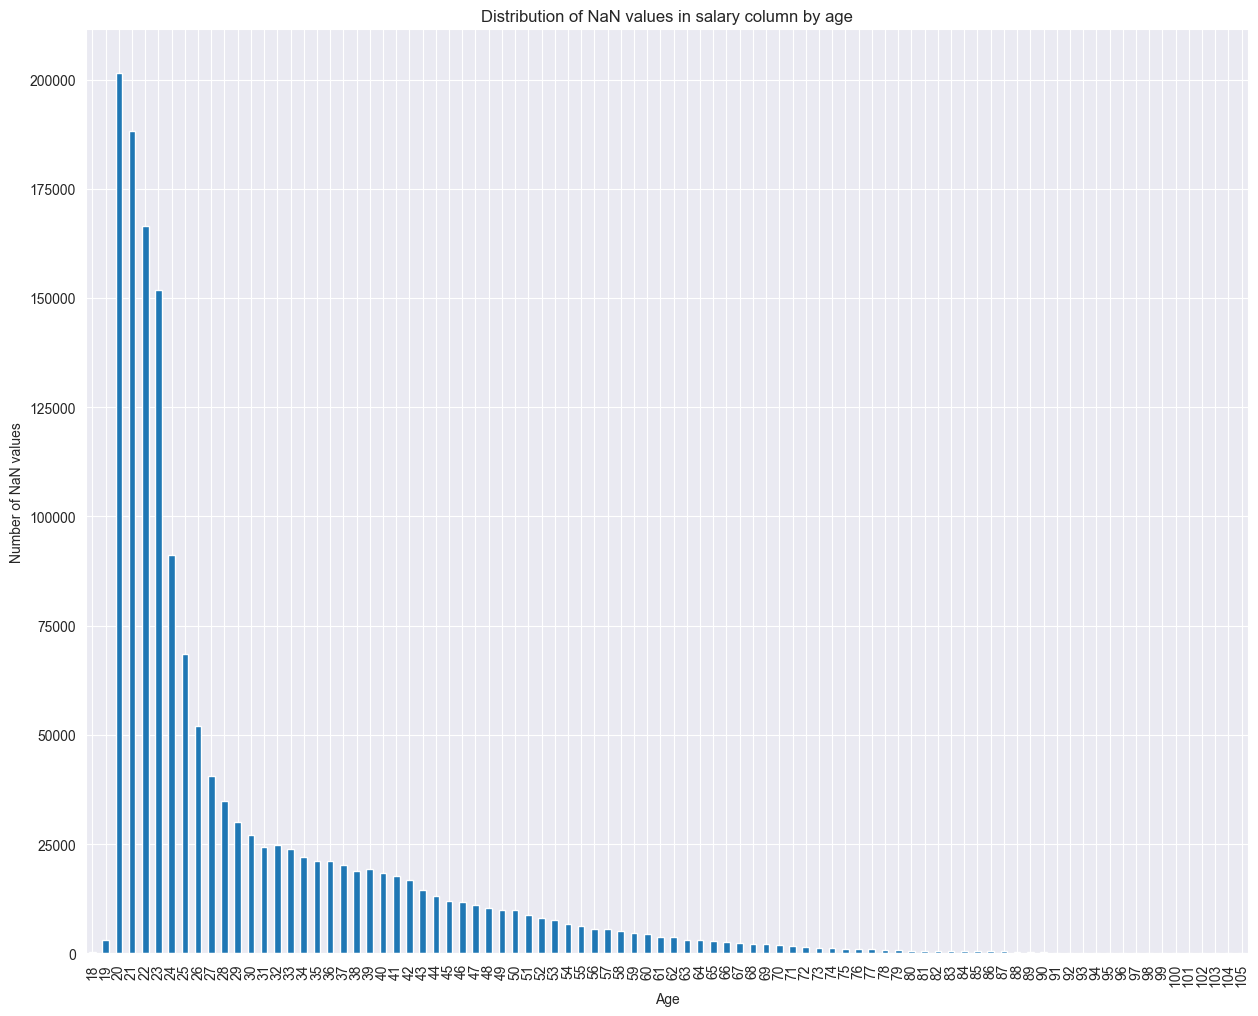

In [427]:
# Create a histogram of NaN values in salary column by age
df.groupby('age')['salary'].apply(lambda x: x.isnull().sum()).plot(kind='bar', figsize=(15,12))
plt.xlabel('Age')
plt.ylabel('Number of NaN values')
plt.title('Distribution of NaN values in salary column by age')
plt.show()

In [428]:
# Calculate median salary for each age group
median_salary_by_age = df.groupby('age')['salary'].median()

# Replace NaN values in salary column with median salary for each age group
df['salary'] = np.where(df['salary'].isnull(), df['age'].map(median_salary_by_age), df['salary'])


In [429]:
outliers(df[['salary']])

df["salary"]
Min: 1202.73, Max: 28894395.51, Q1: 70081.70999999999, Q3: 113234.22
IQR: 43152.51000000001
LOWER/UPPER Range: 5352.944999999978 / 177962.98500000002
Total LOWER/UPPER outliers: 94 / 569504



In [430]:
df[['salary']].describe().T

count      mean       std      min     25%      50%       75%    \
salary 5924710.00 108776.29 173182.74 1202.73 70081.71 88178.46 113234.22   

            max     
salary 28894395.51

In [431]:
len(df[df['salary']>1000000]['pk_cid'].unique())

583

New column called salary_LN which contains the natural logarithm (base e) of the values in the salary column.

In [432]:
df["salary_LN"] = df["salary"].apply(lambda x: np.log1p(x))

In [433]:
df[['salary','salary_LN']].describe()

salary    salary_LN
count  5924710.00 5924710.00
mean    108776.29      11.42
std     173182.74       0.53
min       1202.73       7.09
25%      70081.71      11.16
50%      88178.46      11.39
75%     113234.22      11.64
max   28894395.51      17.18

To deal with outliers in the salary feature, we applied a log transformation to turn it into a normal distribution. We also imputed missing values in the salary feature using the median of the age distribution, assuming that age is a good predictor of salary. These preprocessing steps can help improve the quality of our analysis and capture underlying patterns in the data.

In any case, due to the nature of this feature and its intrinsic limitations it will not be used in further steps like segmentation or recommendation, the main reason being the large amount of missing values.

### **Entry_channel**

In [434]:
df['entry_channel'].value_counts().head(10)

KHE    3113820
KFC     874118
KHQ     590254
KAT     407063
KHK     230127
KHM     176512
KHN     108368
KHD      75899
KFA      67747
RED      60593
Name: entry_channel, dtype: int64

In [435]:
fillna_ffill(df,'entry_channel')

pk_cid  pk_partition country_id region_code  gender  age deceased  \
0        1375586  2018-01-28      ES           Malaga    H    35      N      
1        1050611  2018-01-28      ES      Ciudad Real    V    23      N      
2        1050612  2018-01-28      ES      Ciudad Real    V    23      N      
3        1050613  2018-01-28      ES         Zaragoza    H    22      N      
4        1050614  2018-01-28      ES         Zaragoza    V    23      N      
...          ...          ...        ...          ...    ...  ...      ...   
5926541  1166765  2019-05-28      ES         Zaragoza    V    22      N      
5926542  1166764  2019-05-28      ES         La Rioja    V    23      N      
5926543  1166763  2019-05-28      ES         Zaragoza    H    47      N      
5926544  1166789  2019-05-28      ES         Zaragoza    H    22      N      
5926545  1550586  2019-05-28      ES           Madrid    H    37      N      

          salary   short_term_deposit  loans  ...  active_customer  \
0        87218.10           0            0    ...         1          
1        35548.74           0            0    ...         0          
2       122179.11           0            0    ...         0          
3       119775.54           1            0    ...         0          
4        89371.62           0            0    ...         1          
...           ...                 ...    ...  ...              ...   
5926541  43912.17           0            0    ...         0          
5926542  23334.99           0            0    ...         0          
5926543  91831.98           0            0    ...         1          
5926544 199592.82           0            0    ...         0          
5926545  85203.30           0            0    ...         1          

               segment       Total_products  year_partition  month_partition  \
0         02 - PARTICULARES         1             2018              1          
1        03 - UNIVERSITARIO         1             2018              1          
2        03 - UNIVERSITARIO         1             2018              1          
3        03 - UNIVERSITARIO         1             2018              1          
4        03 - UNIVERSITARIO         1             2018              1          
...                     ...             ...             ...              ...   
5926541  03 - UNIVERSITARIO         1             2019              5          
5926542  03 - UNIVERSITARIO         1             2019              5          
5926543   02 - PARTICULARES         1             2019              5          
5926544  03 - UNIVERSITARIO         1             2019              5          
5926545                 NaN         1             2019              5          

         year_month_partition  quarter_entry  year_month_entry  age_corrected  \
0               2018-01           2018-Q1          2018-01           36         
1               2018-01           2015-Q3          2015-08           24         
2               2018-01           2015-Q3          2015-08           23         
3               2018-01           2015-Q3          2015-08           23         
4               2018-01           2015-Q3          2015-08           24         
...                       ...            ...               ...            ...   
5926541         2019-05           2016-Q3          2016-08           22         
5926542         2019-05           2016-Q3          2016-08           23         
5926543         2019-05           2016-Q3          2016-08           47         
5926544         2019-05           2016-Q3          2016-08           22         
5926545         2019-05           2019-Q2          2019-05           37         

         salary_LN  
0         11.38     
1         10.48     
2         11.71     
3         11.69     
4         11.40     
...            ...  
5926541   10.69     
5926542   10.06     
5926543   11.43     
5926544   12.20     
5926545   11.35     

[5924710 rows x 35 columns]

In [436]:
count_entry=df.groupby('pk_cid')['entry_channel'].nunique().sort_values(ascending=False).reset_index()
count_entry.head(10)

pk_cid   entry_channel
0  1253510        3      
1  1542554        3      
2  1518457        3      
3  1510134        3      
4  1449671        3      
5  1247614        3      
6  1529162        3      
7  1510141        3      
8  1116851        3      
9  1266281        3

In [437]:
count_entries3=count_entry[count_entry['entry_channel']>1]
list_entry=count_entries3['pk_cid'].unique().tolist()
len(list_entry)

9022

In [438]:
df[df['pk_cid']==random.choice(list_entry)].T

2775997              2962298         \
pk_cid                            1495472              1495472   
pk_partition          2018-10-28 00:00:00  2018-11-28 00:00:00   
country_id                             ES                   ES   
region_code                        Madrid               Madrid   
gender                                  V                    V   
age                                    73                   73   
deceased                                N                    N   
salary                          103073.10            103073.10   
short_term_deposit                      0                    0   
loans                                   0                    0   
mortgage                                0                    0   
funds                                   0                    0   
securities                              0                    0   
long_term_deposit                       0                    0   
em_account_pp                           0                    0   
credit_card                             0                    0   
payroll                                 0                    0   
pension_plan                            0                    0   
payroll_account                         0                    0   
emc_account                             0                    0   
debit_card                              0                    0   
em_account_p                            0                    0   
em_acount                               0                    1   
entry_date            2018-10-30 00:00:00  2018-10-30 00:00:00   
entry_channel                         KHN                  KHM   
active_customer                         0                    1   
segment                               NaN    02 - PARTICULARES   
Total_products                          0                    1   
year_partition                       2018                 2018   
month_partition                        10                   11   
year_month_partition              2018-10              2018-11   
quarter_entry                     2018-Q4              2018-Q4   
year_month_entry                  2018-10              2018-10   
age_corrected                          73                   73   
salary_LN                           11.54                11.54   

                           3676433              3823522         \
pk_cid                            1495472              1495472   
pk_partition          2018-12-28 00:00:00  2019-01-28 00:00:00   
country_id                             ES                   ES   
region_code                        Madrid               Madrid   
gender                                  V                    V   
age                                    73                   73   
deceased                                N                    N   
salary                          103073.10            103073.10   
short_term_deposit                      0                    0   
loans                                   0                    0   
mortgage                                0                    0   
funds                                   0                    0   
securities                              0                    0   
long_term_deposit                       0                    0   
em_account_pp                           0                    0   
credit_card                             0                    0   
payroll                                 0                    0   
pension_plan                            0                    0   
payroll_account                         0                    0   
emc_account                             0                    0   
debit_card                              1                    1   
em_account_p                            0                    0   
em_acount                               1                    0   
entry_date            2018-10-30 00:00:00  2018-10-30 00:00:00   


In [439]:

# Filter the df dataframe by customer IDs
filtered_df = df[df['pk_cid'].isin(list_entry)]

# Sort the filtered dataframe by pk_partition and date to ensure the latest report for each customer is last
filtered_df = filtered_df.sort_values(by=['pk_cid', 'pk_partition'])

# Create a dictionary with the latest reported entry channel for each customer
latest_entry = {}
for customer in list_entry:
    entry = filtered_df[filtered_df['pk_cid'] == customer]['entry_channel'].iloc[-1]
    latest_entry[customer] = entry

print(latest_entry)

{1253510: 'KHN', 1542554: 'RED', 1518457: 'RED', 1510134: 'RED', 1449671: 'RED', 1247614: 'KHM', 1529162: 'RED', 1510141: 'KHQ', 1116851: 'RED', 1266281: 'KAT', 1460682: 'KHM', 1523716: 'RED', 1527871: 'RED', 1438537: 'RED', 1531954: 'RED', 1482108: 'KHN', 1421822: 'KHN', 1418594: 'RED', 1490826: 'RED', 1358808: 'KHN', 1523646: 'RED', 1525825: 'RED', 1419065: 'RED', 1396742: 'KHM', 1502299: 'RED', 1422237: 'RED', 1535606: 'RED', 1515571: 'RED', 1458249: 'RED', 1406116: 'RED', 1104095: 'RED', 1263084: 'RED', 1486469: 'RED', 1236647: 'RED', 1518335: 'RED', 1537557: 'RED', 1487925: 'RED', 1432340: 'RED', 1491670: 'RED', 1522921: 'RED', 1398557: 'KHO', 1522162: 'RED', 1526626: 'RED', 1398554: 'KHO', 828469: 'RED', 118772: 'RED', 1523627: 'RED', 1449020: 'RED', 1240096: 'RED', 1533399: 'RED', 1011899: 'KHN', 1233234: 'KAT', 774873: 'RED', 1366187: 'KHN', 1525342: 'RED', 570033: 'KHO', 1441135: 'KHN', 1517212: 'KHO', 1494904: 'RED', 1489131: 'RED', 1521822: 'RED', 1332671: 'RED', 1469276: 'K

In [440]:
# Create a Series object mapping customer IDs to entry channels
entry_map = pd.Series(latest_entry)
# Use boolean indexing to update the entry_channel column in df
df.loc[df['pk_cid'].isin(entry_map.index), 'entry_channel'] = entry_map

In [441]:
top_7_channels = df['entry_channel'].value_counts().nlargest(10).index.tolist()

# Replace values not in top 7 with 'others'
df.loc[~df['entry_channel'].isin(top_7_channels), 'entry_channel'] = 'others'

<AxesSubplot: xlabel='entry_channel', ylabel='count'>

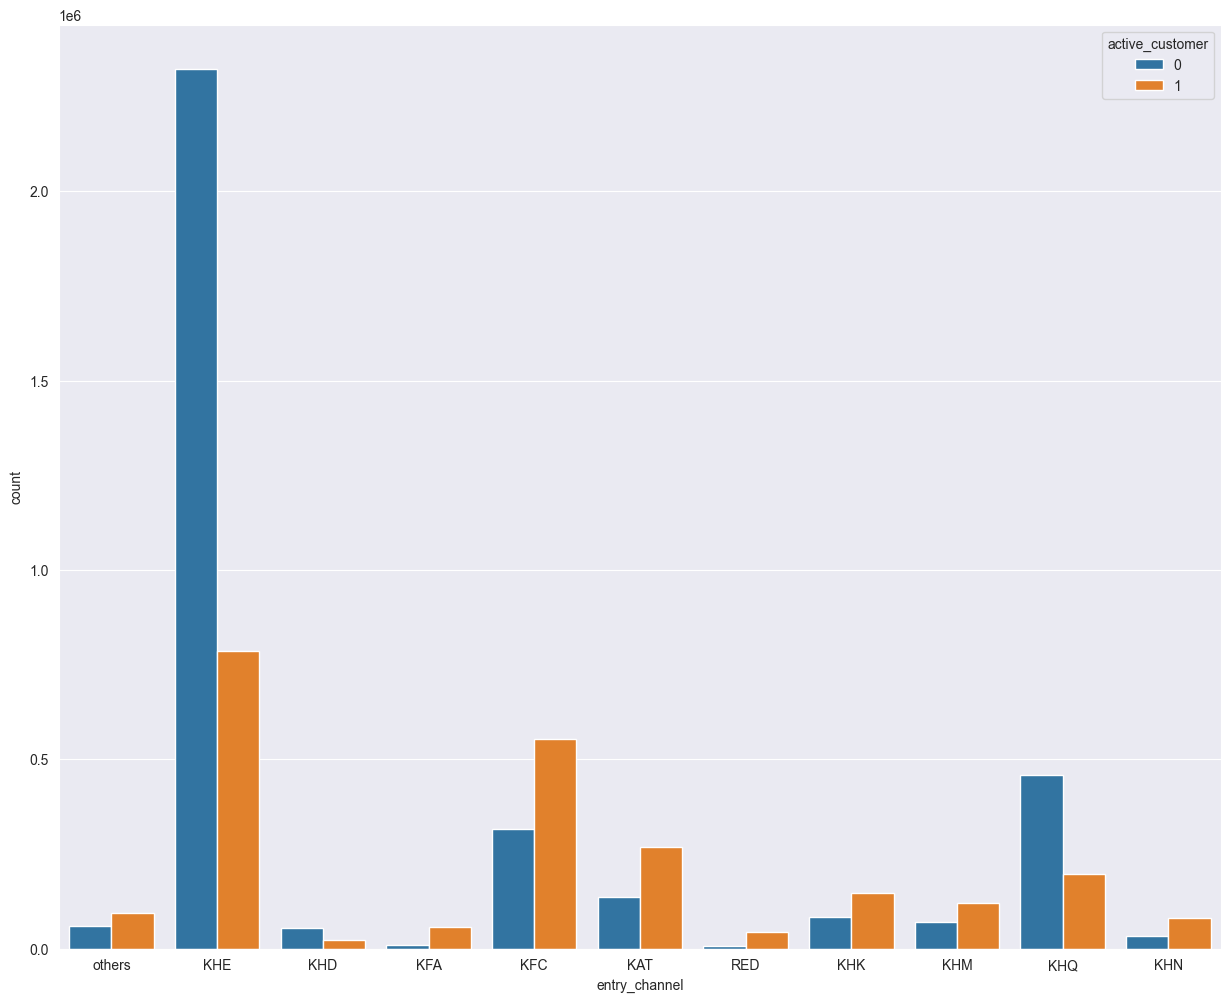

In [442]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 12))
sns.countplot(x='entry_channel', hue='active_customer', data=df)

**A customer acquisition channel refers to the various methods or platforms used by a business to acquire new customers. It is the process of attracting new customers to a business or product.**

The entry_channel feature contained many missing values. To recover this information, we used forward filling to fill in the missing values. We also corrected the data to account for cases where multiple channels were reported for a single customer, using only the latest reported channel.

In our analysis, we focused on the top 7 channels and disregarded the others as 'other'. We observed that some channels are more effective than others in introducing customers to the company. Additionally, we noticed that some channels brought in customers who were not very active. It will be interesting to explore how these customers interact with other features such as products.

## **Products**

Text(0.5, 0.98, 'Distribution of Product Features')

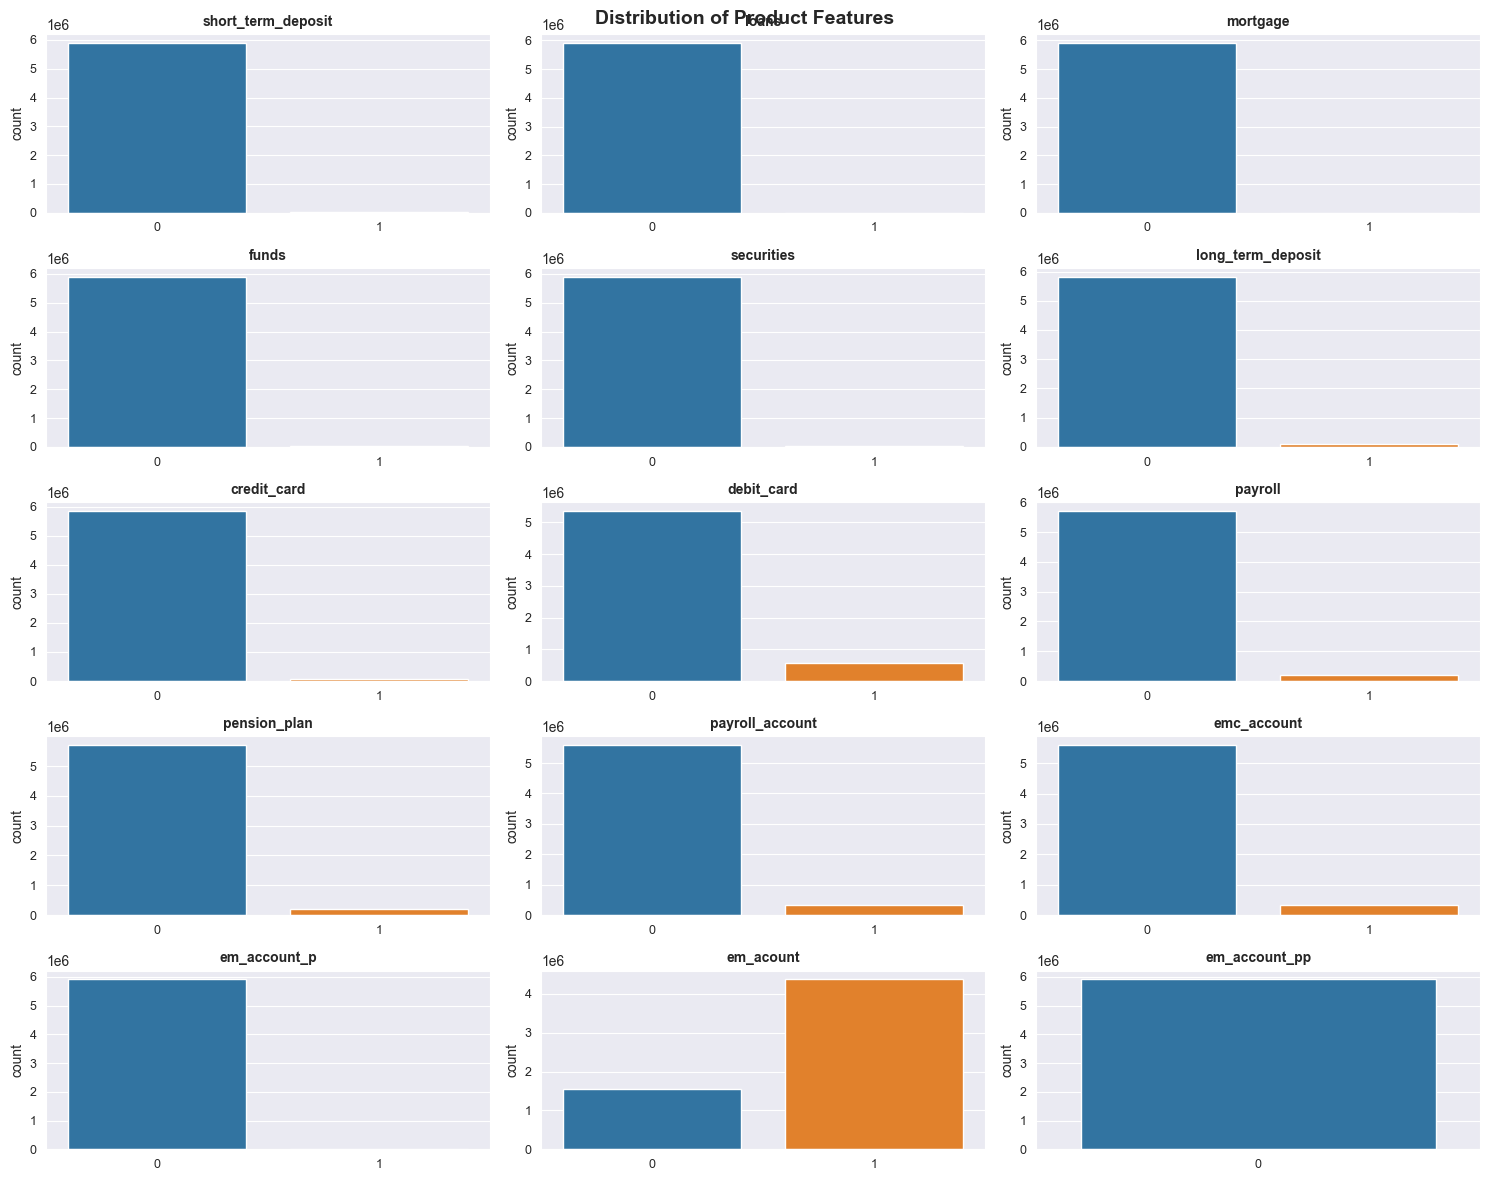

In [443]:
# Select boolean variables from the dataframe
bool_feat = [col for col in products if (df[col].dtype != 'O') and (col != 'pk_cid')]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12))
axes = axes.flat

# Plot each boolean variable using a barplot
for i, col in enumerate(bool_feat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=10, fontweight='bold')
    axes[i].tick_params(labelsize=9)
    axes[i].set_xlabel("")

# Format and title the figure
fig.tight_layout()
fig.subplots_adjust(top=0.96)
fig.suptitle('Distribution of Product Features', fontsize=14, fontweight='bold')


**Note**: Above bar plots show a cumulative of all the times a product was owned/purchased by a customer over all partitions. 

This graph clearly shows what will be seen later on, the dataset is very imbalanced in terms of product distribution. The main product is the base Easy Money account, without any doubt. Then, we have products like debit card, emc account, pension plan and others, which seem to be the second tier products.

In [444]:
# create a new DataFrame with the sum of 1's for each product feature
prod_summary = pd.DataFrame(df[products].sum()).reset_index()
prod_summary.columns = ['Product', 'Count_Purchased']

# calculate percentage of 1's for each product feature
prod_summary['Percentage'] = prod_summary['Count_Purchased'] / len(df) * 100

# filter for features with 1's and sort by percentage
prod_summary = prod_summary[prod_summary['Count_Purchased'] > 0]
prod_summary = prod_summary.sort_values(by='Percentage', ascending=False)

# display summary table
display(prod_summary)

Product        Count_Purchased  Percentage
13           em_acount      4380513        73.94   
7           debit_card       562528         9.49   
10     payroll_account       329073         5.55   
11         emc_account       326429         5.51   
9         pension_plan       217437         3.67   
8              payroll       205719         3.47   
5    long_term_deposit       100291         1.69   
6          credit_card        70813         1.20   
4           securities        22042         0.37   
3                funds        20069         0.34   
0   short_term_deposit        15383         0.26   
1                loans          468         0.01   
2             mortgage          324         0.01   
12        em_account_p           34         0.00

This table is another, perhaps more understandable, way of showing the same information as in the bar plot that has been just discussed. It can indeed be seen that almost a 74% of the customers/partitions have or have had em acocunts, followed (not closely) by debit card, payroll & payroll account, emc account, pension plan... we see that there are customers for every product except for em account pp. 

Text(0.5, 0.98, 'Monthly evolution of product features')

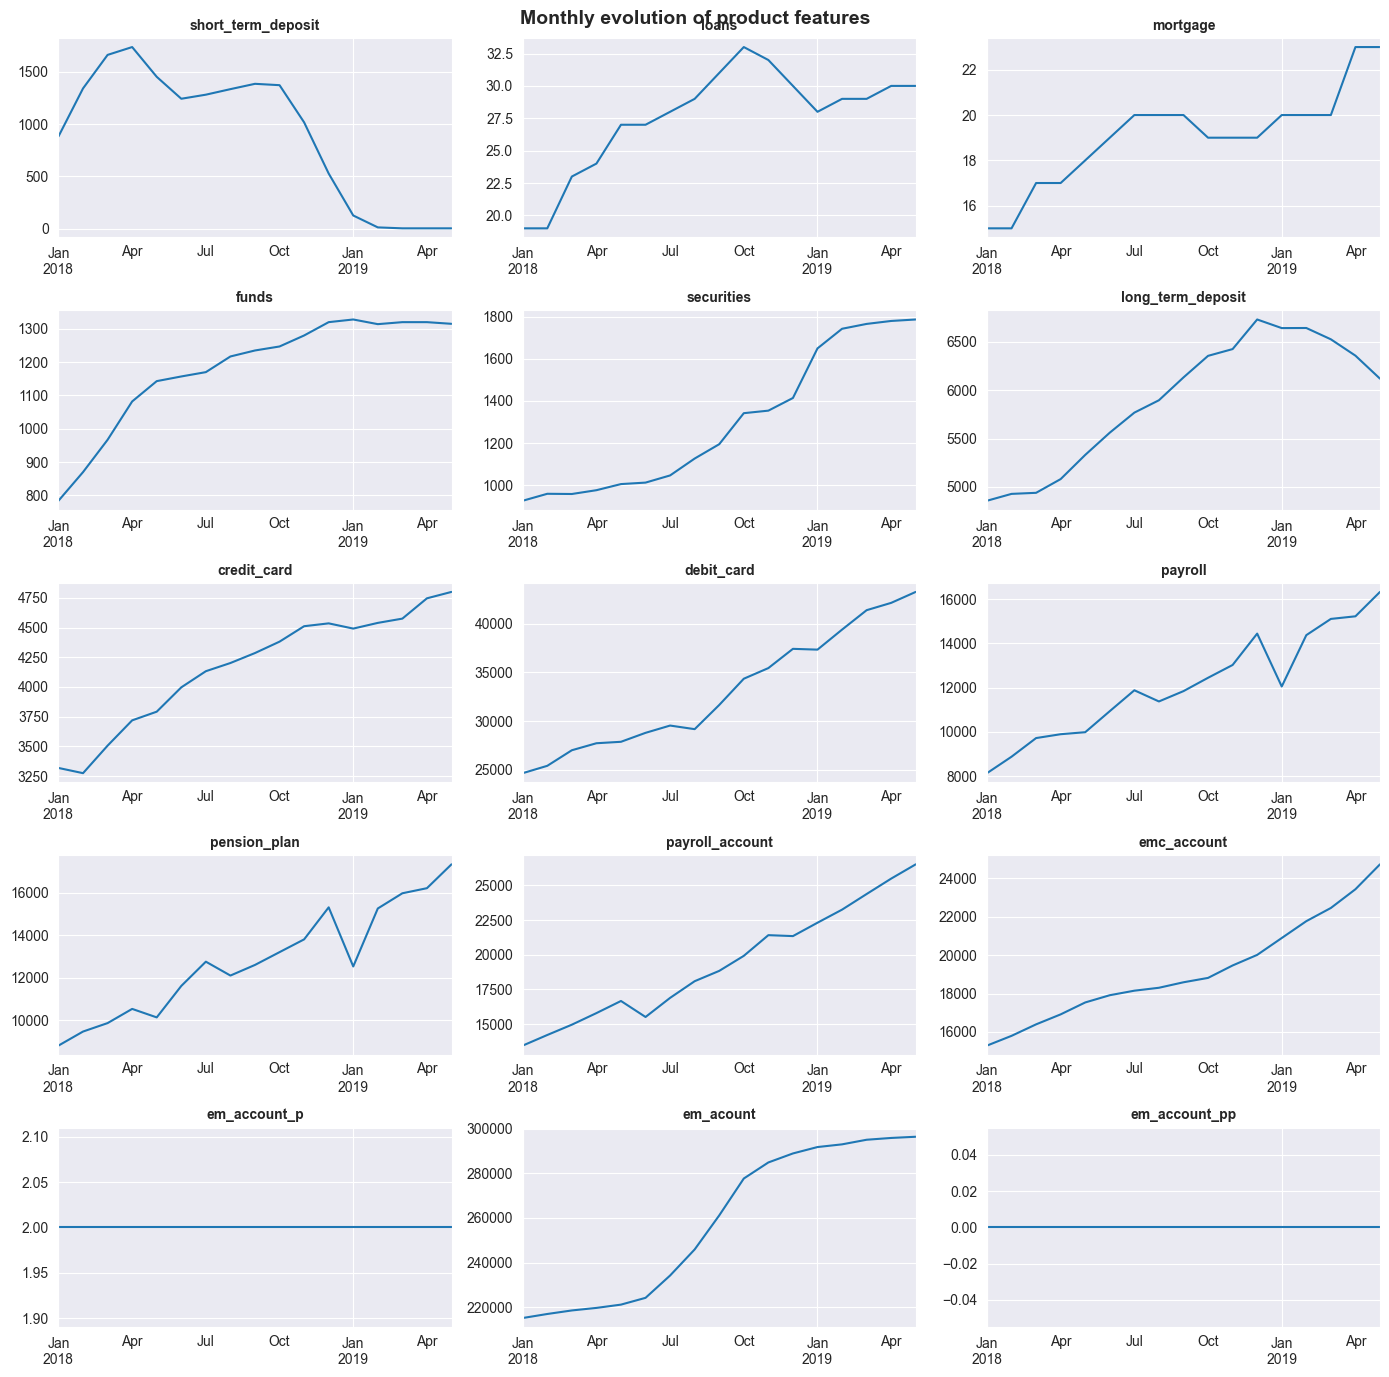

In [445]:
# set dates as index

products_df_bydate = df.set_index('pk_partition')

# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(bool_feat):
    products_df_bydate.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')

In [446]:
# customers with EM account pp
_pp_users = df.loc[df['em_account_p']==1,'pk_cid'].unique()
df[df['pk_cid'].isin(_pp_users)].groupby('pk_cid').agg(sum).iloc[:,2:17]

short_term_deposit  loans  mortgage  funds  securities  \
pk_cid                                                           
313778           0            0        0       0        17       
645092           0            0        0       0         0       

        long_term_deposit  em_account_pp  credit_card  payroll  pension_plan  \
pk_cid                                                                         
313778          0                0             0          0           0        
645092          0                0             5          5           5        

        payroll_account  emc_account  debit_card  em_account_p  em_acount  
pk_cid                                                                     
313778         0              0            0           17          17      
645092        11              0            8           17           6

Upon analyzing the cumulative performance of different products over time, it appears that certain products may be causing the company to overextend itself. The data reveals several notable trends:

- Short-term deposits began well but have since dwindled to zero, meaning that the retention has plummeted over time and now we have ver few clients with this product.
- Loans and mortgages have few clients relative to the company's customer base but with a rather good retention. Nonetheless, it would be prudent to assess the revenue generated by these products, as a high revenue may justify their continuation and prompt further efforts to expand the client base.
- Funds and securities do not have many customers either but still a few and seem to be stable.
- Long term deposit seem to be sharply decreasing. This might be due to the clients preferring other companies/banks for specific long term deposits or because the clientbase is shifting towards using their money in other products of the company, such as em wallet or investing in cryptocurrency. This trend could indicate that the company may be better suited to operate as a fintech platform in the mold of Revolut.
- EM account is the star product in term of customer base and seems very stable also.
- EM account + and EM account ++: the former has two clients since the beginning of the records and the former has zero. This information must be reported to the board for further action.
- The rest of the products have different amount of clients but a fair amount and in general have good growth.
- One last point to note is that, by the definition given by the company, payroll account is "Account awarded with a bonus due to payroll". It seems to make no sense that there are more users with payroll account (+25k) than with payroll (+16k) being the former awarded for the latter.

In conclusion, the data highlights both strengths and weaknesses in the company's product offerings. While certain products may be underperforming or unsuitable, others show promise for future growth. The company should consider reevaluating its current strategy to optimize its product lineup and capitalize on market opportunities.

## **Remaining features**

The "Active Customer" feature is a crucial metric that provides insight into a customer's level of engagement with the company's platform. It allows us to assess their overall behavior and activity within our ecosystem, it has been used as an indicator while studying some of the other features and won't be studied on its own.

Regarding the last remaining feature. "Segment", it will be disregarded from this point on as it appears to be an incomplete attempt to segment the customer base. Instead, a different way of segmenting the customer base will be suggested, using more robust methodologies to accurately segment and understand our customer base. This will enable to tailor our products and services to better meet the needs and preferences of each customer segment, thereby driving growth and retention.

<a id="1.2"></a>
<font color=green size=+2><b>1.2 - Save dataset</b></font>

Several features have been engineered and some customers have been dropped from the working dataframe due to the fact that they add no value when moving on further in the analysis and it potential use for a Machine Learning model. 

One last step before saving the final dataframe as a csv that can be used for other purposes, will be to remove the features that will have no use or add any value during the segmentation and recommendation phases, either because of them being engineered already or because of their nature: deceased, em_account_pp, em_account_p and segment.

In [447]:
list_drop_columns=['deceased','em_account_pp','em_account_p','segment']

In [448]:
df=df.drop(list_drop_columns, axis=1)

In [449]:
df.to_csv('Bobs_df_delivery.csv', index=False)

<a id="2"></a>
<font color=green size=+3><b>2 - Exploratory Analysis - EDA </b></font>

The main objective of Exploratory Data Analysis (EDA) is to understand the data and gain insights from it, and generally become familiar with the characteristics and limitations of the data.

In this chapter we will compare different features and draw our main conclusions

In [450]:
products.remove('em_account_p')
products.remove('em_account_pp')

### **User functions**

In [451]:
def get_second_best_product(row):
    # Get the index of the maximum value
    max_index = row.idxmax()
    # Replace the maximum value with zero
    row[max_index] = 0
    # Get the index of the second maximum value
    second_max_index = row.idxmax()
    return second_max_index


def get_product_summary(df, group_feature):
    # Group by the specified feature
    grouped = df.groupby(group_feature)
    
    # Compute total customers per group
    total_customers = grouped['pk_cid'].nunique()
    
    # Compute product totals per group
    product_totals = grouped[products].sum()
    
    # Compute best and second best products per group
    best_product = product_totals.idxmax(axis=1)
    second_best_product = product_totals.apply(get_second_best_product, axis=1)
    
    # Combine results into a single DataFrame
    result = pd.concat([total_customers, best_product, second_best_product, product_totals], axis=1)
    
    # Rename columns for clarity
    result.rename(columns={0: 'Best_product'}, inplace=True)
    result.rename(columns={1: '2nd_Best_product'}, inplace=True)
    result.rename(columns={'pk_cid': 'Totals_Pk_cid_per_EC'}, inplace=True)
    
    # Display results using a color gradient
    display(result.style.background_gradient(axis=1))
    
    # =========================================================
def numerical_distribution(df,feature, feature_2):
    
    print(f"{feature} Overview:")
    integers = range(len(df[feature]))
    fig = sns.scatterplot(data = df, 
        x = integers, 
        y = feature, 
        hue = feature_2, 
        style = feature_2)
 
    print(99 * "#")
    quartile_1, quartile_3 = np.percentile(df[feature], [25, 75])
    IQR= quartile_3 - quartile_1
   
    median = np.median(df[feature])
    absolute_deviations = np.abs(df[feature] - median)
    median_absolute_deviation = np.median(absolute_deviations)
    mcv = median_absolute_deviation / median

    print(f"Summary statistics\n {df[[feature]].describe()}")
    print()
    print('Outliers analysis:\n')
    print(f'IQR: {IQR} || (median_abs_deviation): {median_absolute_deviation}|| The Median-based index: {mcv} ')

# =========================================================
def feature_vs_target_w_lengh(data, feature, TARGET, active_customers = True, grouped = True):

    title_sub = ""
    if active_customers == True:
        data[data["active_customer"] == 1]
        title_sub = "Active customers"
    if grouped == True:
        data = data.drop_duplicates(subset = "pk_cid", keep = "last")
        title_sub = "Unique " + title_sub
    
    sleep_pivot = data.pivot_table(
        index = [feature], values = TARGET,
        aggfunc = [len, sum, np.mean]).sort_values(by = [("mean", TARGET)], ascending = False)

    fig, ax = plt.subplots(figsize=(15, 12))
    scatter = ax.scatter(
        sleep_pivot.index, sleep_pivot[("mean", TARGET)], c = sleep_pivot[("len", TARGET)], 
        cmap = "viridis", alpha = 0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel(TARGET + " rate")
    ax.set_title(title_sub + "\n" + feature + " vs " + TARGET + " Rate")
    cbar = fig.colorbar(scatter)
    cbar.set_label("cardinality of observations")
    plt.show()

# =========================================================
def four_feature_scatterer(data, category, aggfunc, grouped = True, subset = False):

    title = f"by {category}<br>{list(aggfunc.keys())[0]} vs {list(aggfunc.keys())[1]} vs {list(aggfunc.keys())[2]}"

    if subset != False:
        data = data[data[subset[0]] == subset[1]]
        title = f"{subset[0]} {title}  "
    if grouped == True:
        df_prep = data.groupby(["pk_cid", category]).agg(aggfunc).reset_index()
        vis_data = df_prep.groupby(category).agg(aggfunc).sort_values(by = list(aggfunc.keys())[2], ascending = False)
    else:
        vis_data = data.groupby(category).agg(aggfunc).sort_values(by = list(aggfunc.keys())[2], ascending = False)
        
    fig = px.scatter(
        vis_data, 
        x = list(aggfunc.keys())[0], 
        y = list(aggfunc.keys())[1], 
        color = vis_data.index, 
        size = list(aggfunc.keys())[2])
    fig.update_layout(
        barmode = "overlay",
        title = { "text": title, 
        "x": 0.5, "xanchor": "center" })
    fig.show()

# =========================================================
def monthly_sales_bars(data, product_list, title, plot = True):

    df__ = data.reset_index().melt(id_vars = ["pk_partition", "pk_cid"], value_vars = product_list)
    
    df__ = df__[(df__["value"] == 1) & (df__.groupby("pk_cid")["value"].shift() == 0)]
    result = df__.groupby(["pk_partition", "variable"])["pk_cid"].nunique().reset_index(name = "sales")
    result["pk_partition"] = result["pk_partition"].astype(str)
    result = result[result["pk_partition"] != "2018-01-28"] # skipping the first month, as we can't compare with the previous month (we don't have the data)

    if plot == True:
        plt.figure(figsize = (15, 5))
        sns.barplot(x = "pk_partition", y = "sales", hue = "variable", data = result)
        plt.ylabel("Number of Sales")
        plt.title(f"{title} - Monthly sales")
        plt.xticks(rotation = 45)
        plt.show()

    return result


### **Identify what are the top products per entry channel**

In [452]:
get_product_summary(df, 'entry_channel')

The table shows the results of grouping customers by their entry channel and calculating the total number of unique customers per channel, as well as the total number of customers who purchased each of the listed products. The table also displays the best and second-best selling products for each channel.

The most common entry channel is "KHE", which accounts for the majority of customers. 'em_acount' and "Debit_card" are the most popular products overall, followed by 'emc_account'.

Overall, this table provides insights into the preferences of customers based on their entry channel, which can help inform marketing and sales strategies.

### **Identify what are the top products per region**

In [453]:
get_product_summary(df, 'region_code')

After analyzing the data, we have found that the main products used by for each region are em_account, debit card, and emc_account. This information is similar to our previous analysis on the entry_channel. 

## **Identify what are the best products per salary category**

In [454]:
import pandas as pd
from sklearn.cluster import KMeans

# Select the numerical salary feature to cluster
X = df['salary'].values.reshape(-1, 1)

# Cluster the data into five groups using KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Create a new feature with the cluster group names
df['salary_category'] = kmeans.predict(X)
df['salary_category'] = df['salary_category'].map({0: 'Very Low', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})

In [455]:
get_product_summary(df,'salary_category')

Once again the salary feature does not provide any different results.

## **Identify what are the best products per age category**

In [456]:
# Select the numerical age feature to cluster
X = df['age'].values.reshape(-1, 1)

# Cluster the data into five groups using KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Create a new feature with the cluster group names
df['age_category'] = kmeans.predict(X)
df['age_category'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 110], labels=['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior', 'Elderly'])

In [457]:
get_product_summary(df,'age_category')

Upon analyzing the data, it was observed that senior and elderly customers have a significant interest in the emc_account, which is their second most preferred account. This could indicate that they are more inclined towards investing in crypto products for easy monetary gains. On the other hand, it was noted that young customers are more focused on setting up their first account and acquiring a debit card.

In [459]:
df_2019_05=df[df['year_month_partition']=='2019-05']
labels=['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior', 'Elderly']

# Define DataFrame to store product purchase counts by age category, one with absolut values, the other with percentages
df_products_by_ages = pd.DataFrame(index=labels, columns=products)
df_products_by_ages_pct = pd.DataFrame(index=labels, columns=products)


# Loop through age categories and products
for age in labels:
    for prod in products:
        # Calculate the total number of purchases of this product by customers in this age category
        total_purchases = df_2019_05.loc[df['age_category'] == age, prod].sum()
        
        # Assign the total to the appropriate cell in the DataFrame
        df_products_by_ages.loc[age, prod] = total_purchases
        
        # Calculate the percentage of customers in this age category who have purchased this product
        total_customers = df_2019_05.loc[df['age_category'] == age].shape[0]
        percentage = (total_purchases / total_customers) * 100
        
        # Assign the percentage to the appropriate cell in the DataFrame, rounded to 2 decimal places
        df_products_by_ages_pct.loc[age, prod] = round(percentage, 2)

In [460]:
df_products_by_ages.T

Child  Young Adult Adult  Middle-aged Senior Elderly
short_term_deposit      0         0        1         0        0      1 
loans                   0        13       10         3        4      0 
mortgage                0         1       10         5        7      0 
funds                   0       124      289       322      315    265 
securities              8       215      521       505      303    234 
long_term_deposit       6       241     1074      1630     1343   1825 
credit_card            10       579     1798      1410      675    329 
debit_card            389     12124    16624      8588     3664   1857 
payroll                90      5103     6438      3099     1300    302 
pension_plan          108      5284     6513      3205     1405    810 
payroll_account       214      8821     9769      4669     1998   1049 
emc_account           150      2869     8059      6734     3669   3250 
em_acount           15166    199560    40273     22080    11338   7910

In [461]:
df_products_by_ages_pct.T

Child Young Adult Adult Middle-aged Senior Elderly
short_term_deposit  0.00     0.00     0.00     0.00     0.00    0.01 
loans               0.00     0.00     0.01     0.01     0.02    0.00 
mortgage            0.00     0.00     0.01     0.01     0.03    0.00 
funds               0.00     0.05     0.41     0.78     1.54    1.73 
securities          0.03     0.08     0.74     1.22     1.48    1.53 
long_term_deposit   0.02     0.09     1.52     3.95     6.57   11.93 
credit_card         0.04     0.22     2.55     3.42     3.30    2.15 
debit_card          1.56     4.53    23.60    20.82    17.93   12.14 
payroll             0.36     1.91     9.14     7.51     6.36    1.97 
pension_plan        0.43     1.97     9.24     7.77     6.87    5.30 
payroll_account     0.86     3.30    13.87    11.32     9.78    6.86 
emc_account         0.60     1.07    11.44    16.32    17.95   21.25 
em_acount          60.63    74.55    57.16    53.52    55.48   51.71

Overall, the data seems to show that certain financial products are more popular among certain age groups:

It can be seen that loans are popular among almost all groups but specially young adults, while mortgages start to be seen from Adults on, which makes sense. There are quite a number of Senior and Elderly customers that have Long term deposits and pension plans, the latter products seems specially counter intuitive as they should be enjoying their pension plan rather than still putting more money on it. It can be a topic for further study. Other products like debit cards and payrolls seem to be more popular between young adults and middle age customers.

## **Identify patterns in the entry_level distribution**

In [462]:
df_test=df[df['active_customer']==1]

In [463]:
df_entrydate_by_channel = pd.crosstab(df_test['entry_channel'], df_test['quarter_entry'])
df_entrydate_by_channel = df_entrydate_by_channel.astype(int)

df_entrydate_by_channel=df_entrydate_by_channel.transpose()

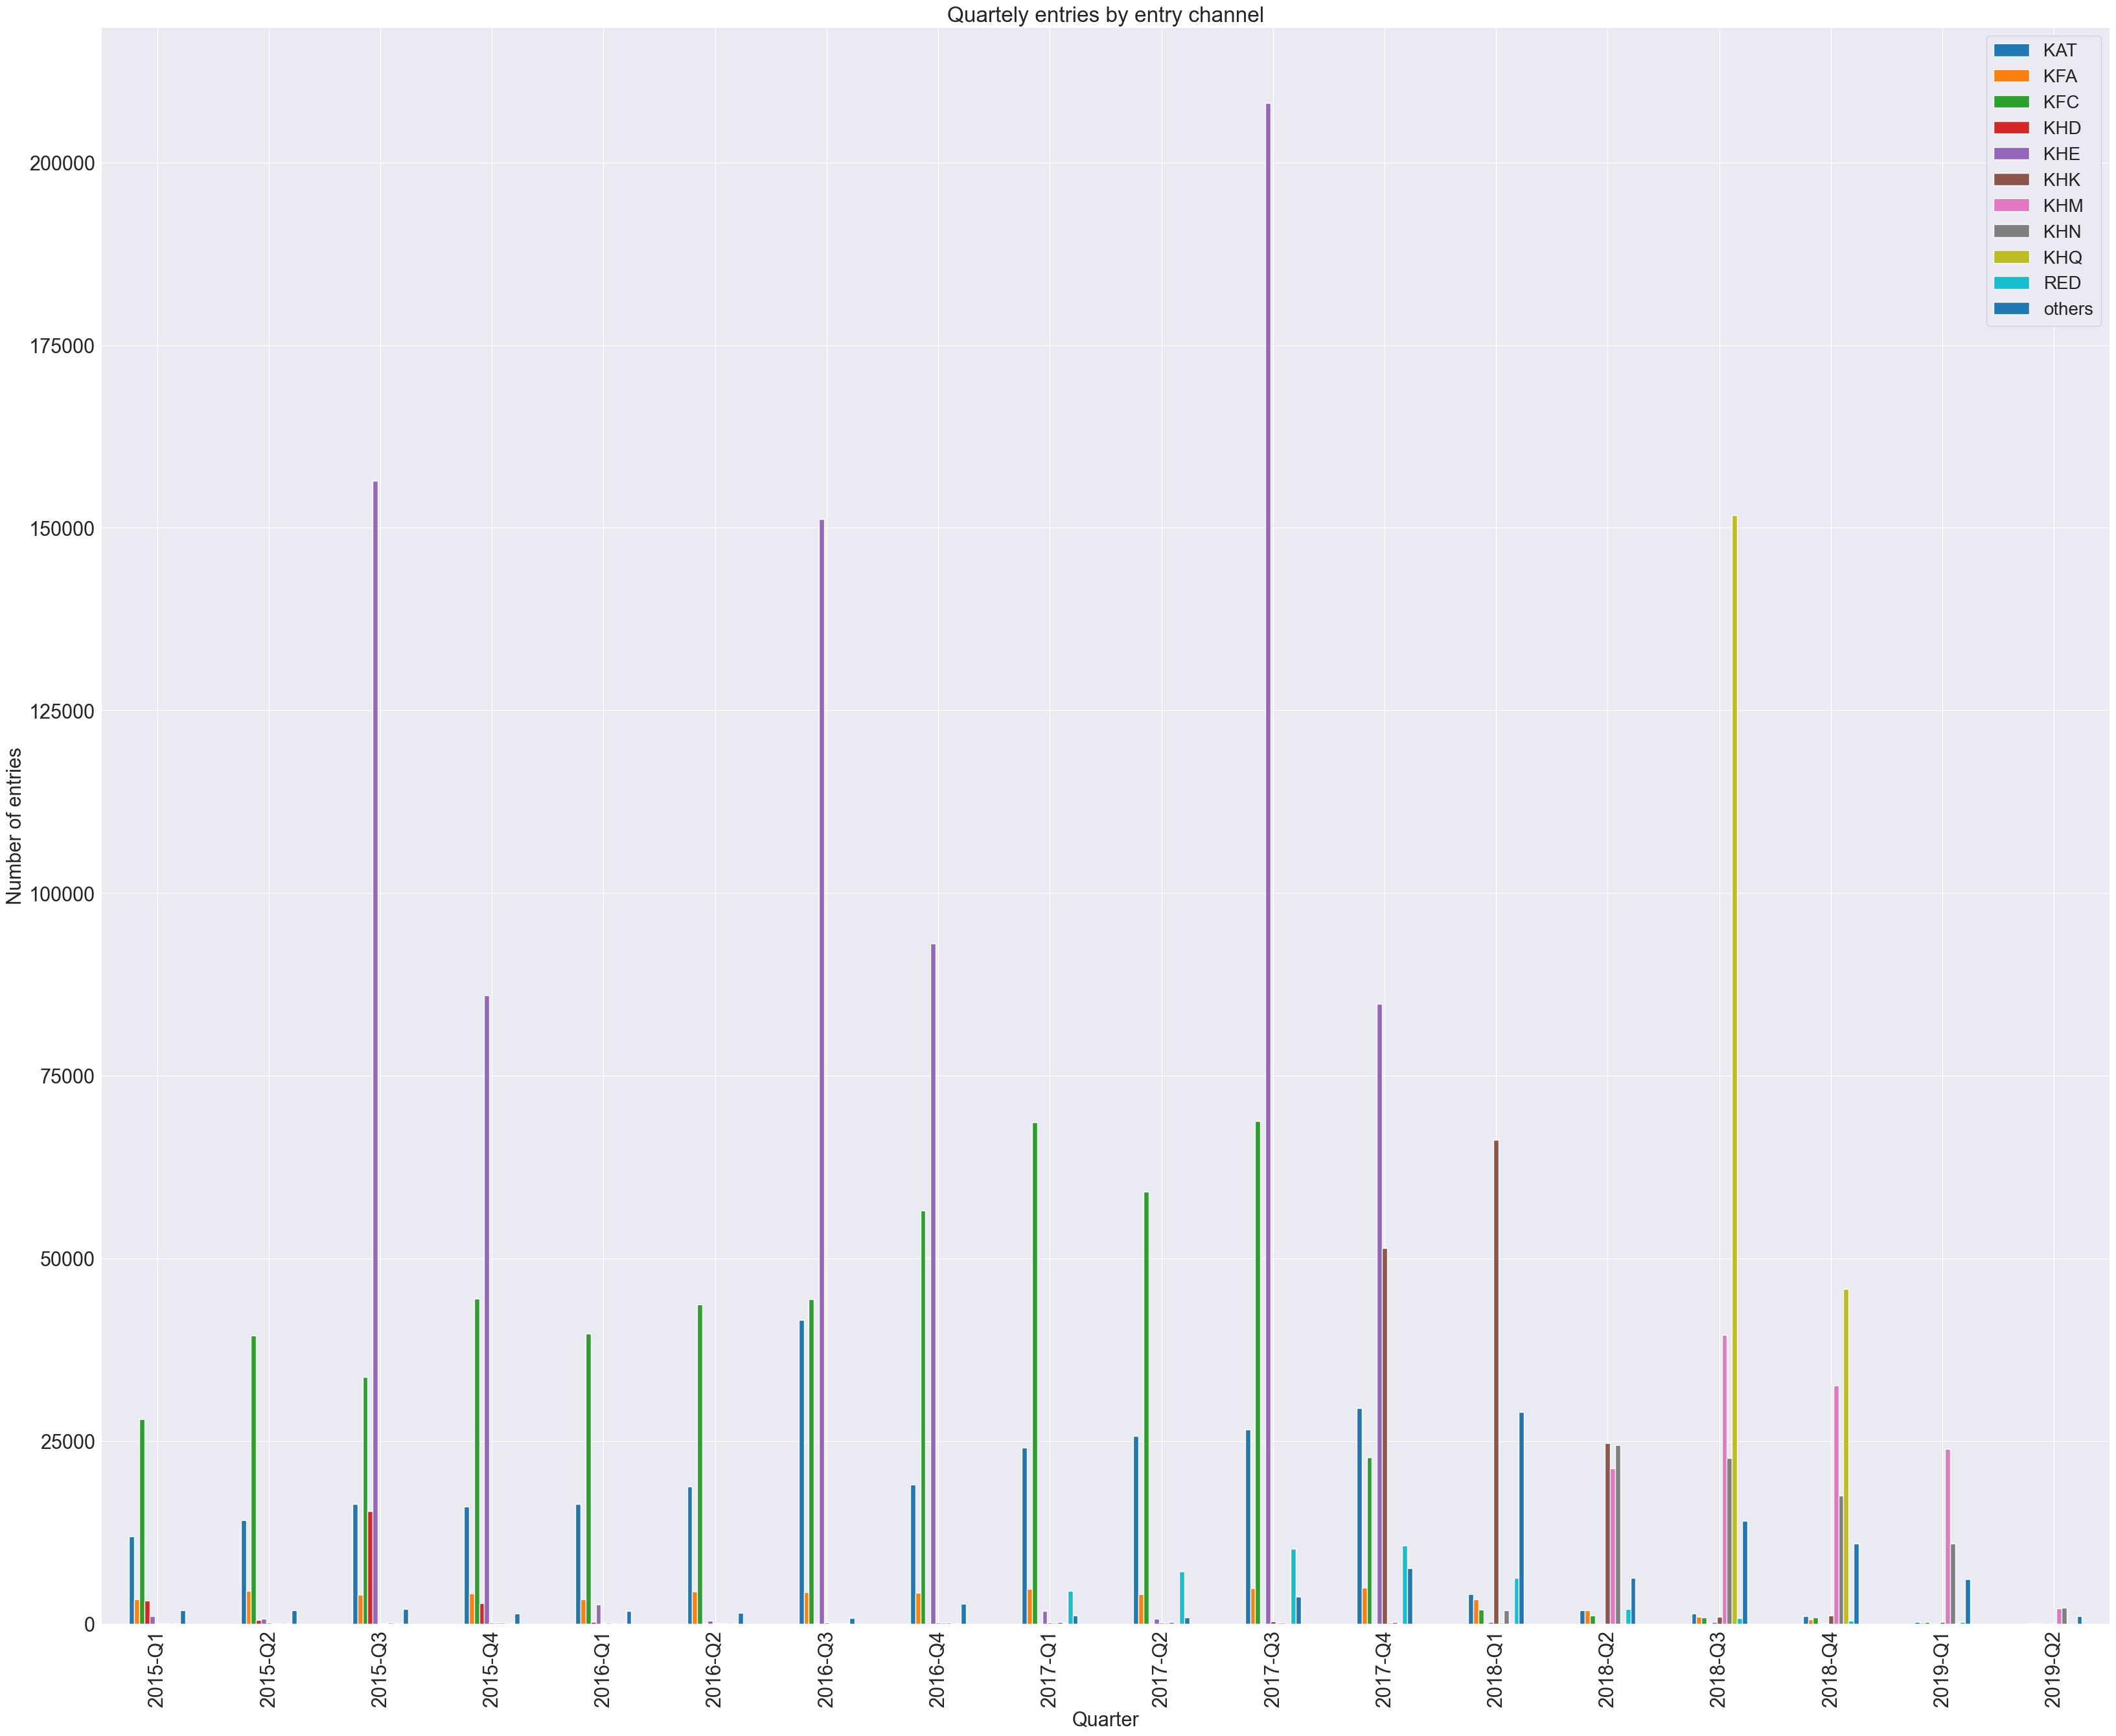

In [468]:
df_entrydate_by_channel.plot(kind='bar', figsize=(40, 32))

# set the title and axis labels
plt.title('Quartely entries by entry channel', fontsize=24)
plt.xlabel('Quarter')
plt.ylabel('Number of entries')
plt.rcParams.update({'font.size': 40})
# set the font size of the legend
plt.legend(fontsize=20)
# show the plot
plt.show()

In [469]:
df_entrydate_by_channel

entry_channel   KAT    KFA   KFC    KHD     KHE    KHK    KHM    KHN     KHQ   \
quarter_entry                                                                   
2015-Q1        11956  3377  27998   3185    1018     57     37     35       0   
2015-Q2        14195  4511  39471    472     635    100     75     69       0   
2015-Q3        16409  3921  33778  15402  156419     79     89    148      31   
2015-Q4        15986  4129  44522   2818   86041    136    116    176       8   
2016-Q1        16392  3299  39714    238    2581     92    107     66       0   
2016-Q2        18725  4396  43654     51     377     48     90     55       0   
2016-Q3        41602  4294  44393     17  151229    111     93     90      40   
2016-Q4        19007  4249  56521      0   93135    118    111    181       0   
2017-Q1        24052  4749  68629      0    1701    154    145    191      17   
2017-Q2        25726  4068  59154      0     704    113    145    269       0   
2017-Q3        26578  4844  68776      0  208136    359    131    184       8   
2017-Q4        29491  4971  22715      0   84875  51435    169    242      22   
2018-Q1         4075  3373   1954      0     203  66238    123   1795      16   
2018-Q2         1860  1817   1133      0       0  24692  21220  24418       1   
2018-Q3         1382   968    880     11     219    932  39552  22641  151761   
2018-Q4         1024   565    847      0      26   1129  32561  17502   45830   
2019-Q1          262   162    255      0       4    238  23875  10957      49   
2019-Q2           38    13     26      0       1     31   2101   2141       1   

entry_channel   RED   others  
quarter_entry                 
2015-Q1           67    1829  
2015-Q2           73    1855  
2015-Q3           85    2005  
2015-Q4           54    1361  
2016-Q1           53    1739  
2016-Q2           90    1439  
2016-Q3           92     721  
2016-Q4           30    2684  
2017-Q1         4511    1098  
2017-Q2         7128     876  
2017-Q3        10233    3708  
2017-Q4        10688    7622  
2018-Q1         6291   28993  
2018-Q2         2026    6291  
2018-Q3          775   14091  
2018-Q4          412   10934  
2019-Q1          244    6060  
2019-Q2            6    1018

New registries vary accross the different channels and accross years: KHE, seems ot be the main channel of acquisition during the seasons that have been seen before in this report. However, in Q3 it seems to be no longer used as in previous years and becomes the second lowest performing entry channel (in terms of absolute number of users).
Channels like KAT, KFA and KFC, even though amongst themselves they have different numbers, they seem the have been steady channels of customer acquisition until 2018, year in which they seem to start being disused.

Channels once performing well start reducing performance progrsively from 2018. This trend matches the rise in performance of other channels like KHK and specially KHM and KHN, which start gaining importance during 2018, year during which those are the main entry channels. RED also has a fair spike in user acquisition, specially during 2017.

Overall, this data suggests that different entry channels have very different levels of popularity, and that some channels may be more reliable or consistent than others in terms of their number of entries over time. It might also be related to the different strategies that EasyMoney has followed for targetting potential customers.

### **Identify the distribution of products for customers that join for the first time (from 2018)**

Due to the fact that only partitions of the data since January 2018 are available, the state of customers at the moment of joining cannot be known if they joined before the aforementioned date. In order to evaluate which products were acquired for new joining customers, the focus will be put on customers joining from 28-01-2018 onwards.

In [472]:
check_dates_df = df.loc[df['entry_date']>='2018-01-28'].copy()

check_dates_df.set_index('entry_date', inplace=True)

check_dates_df.drop_duplicates('pk_cid', inplace=True)

Text(0.5, 0.98, 'Monthly evolution of product features from Entry date')

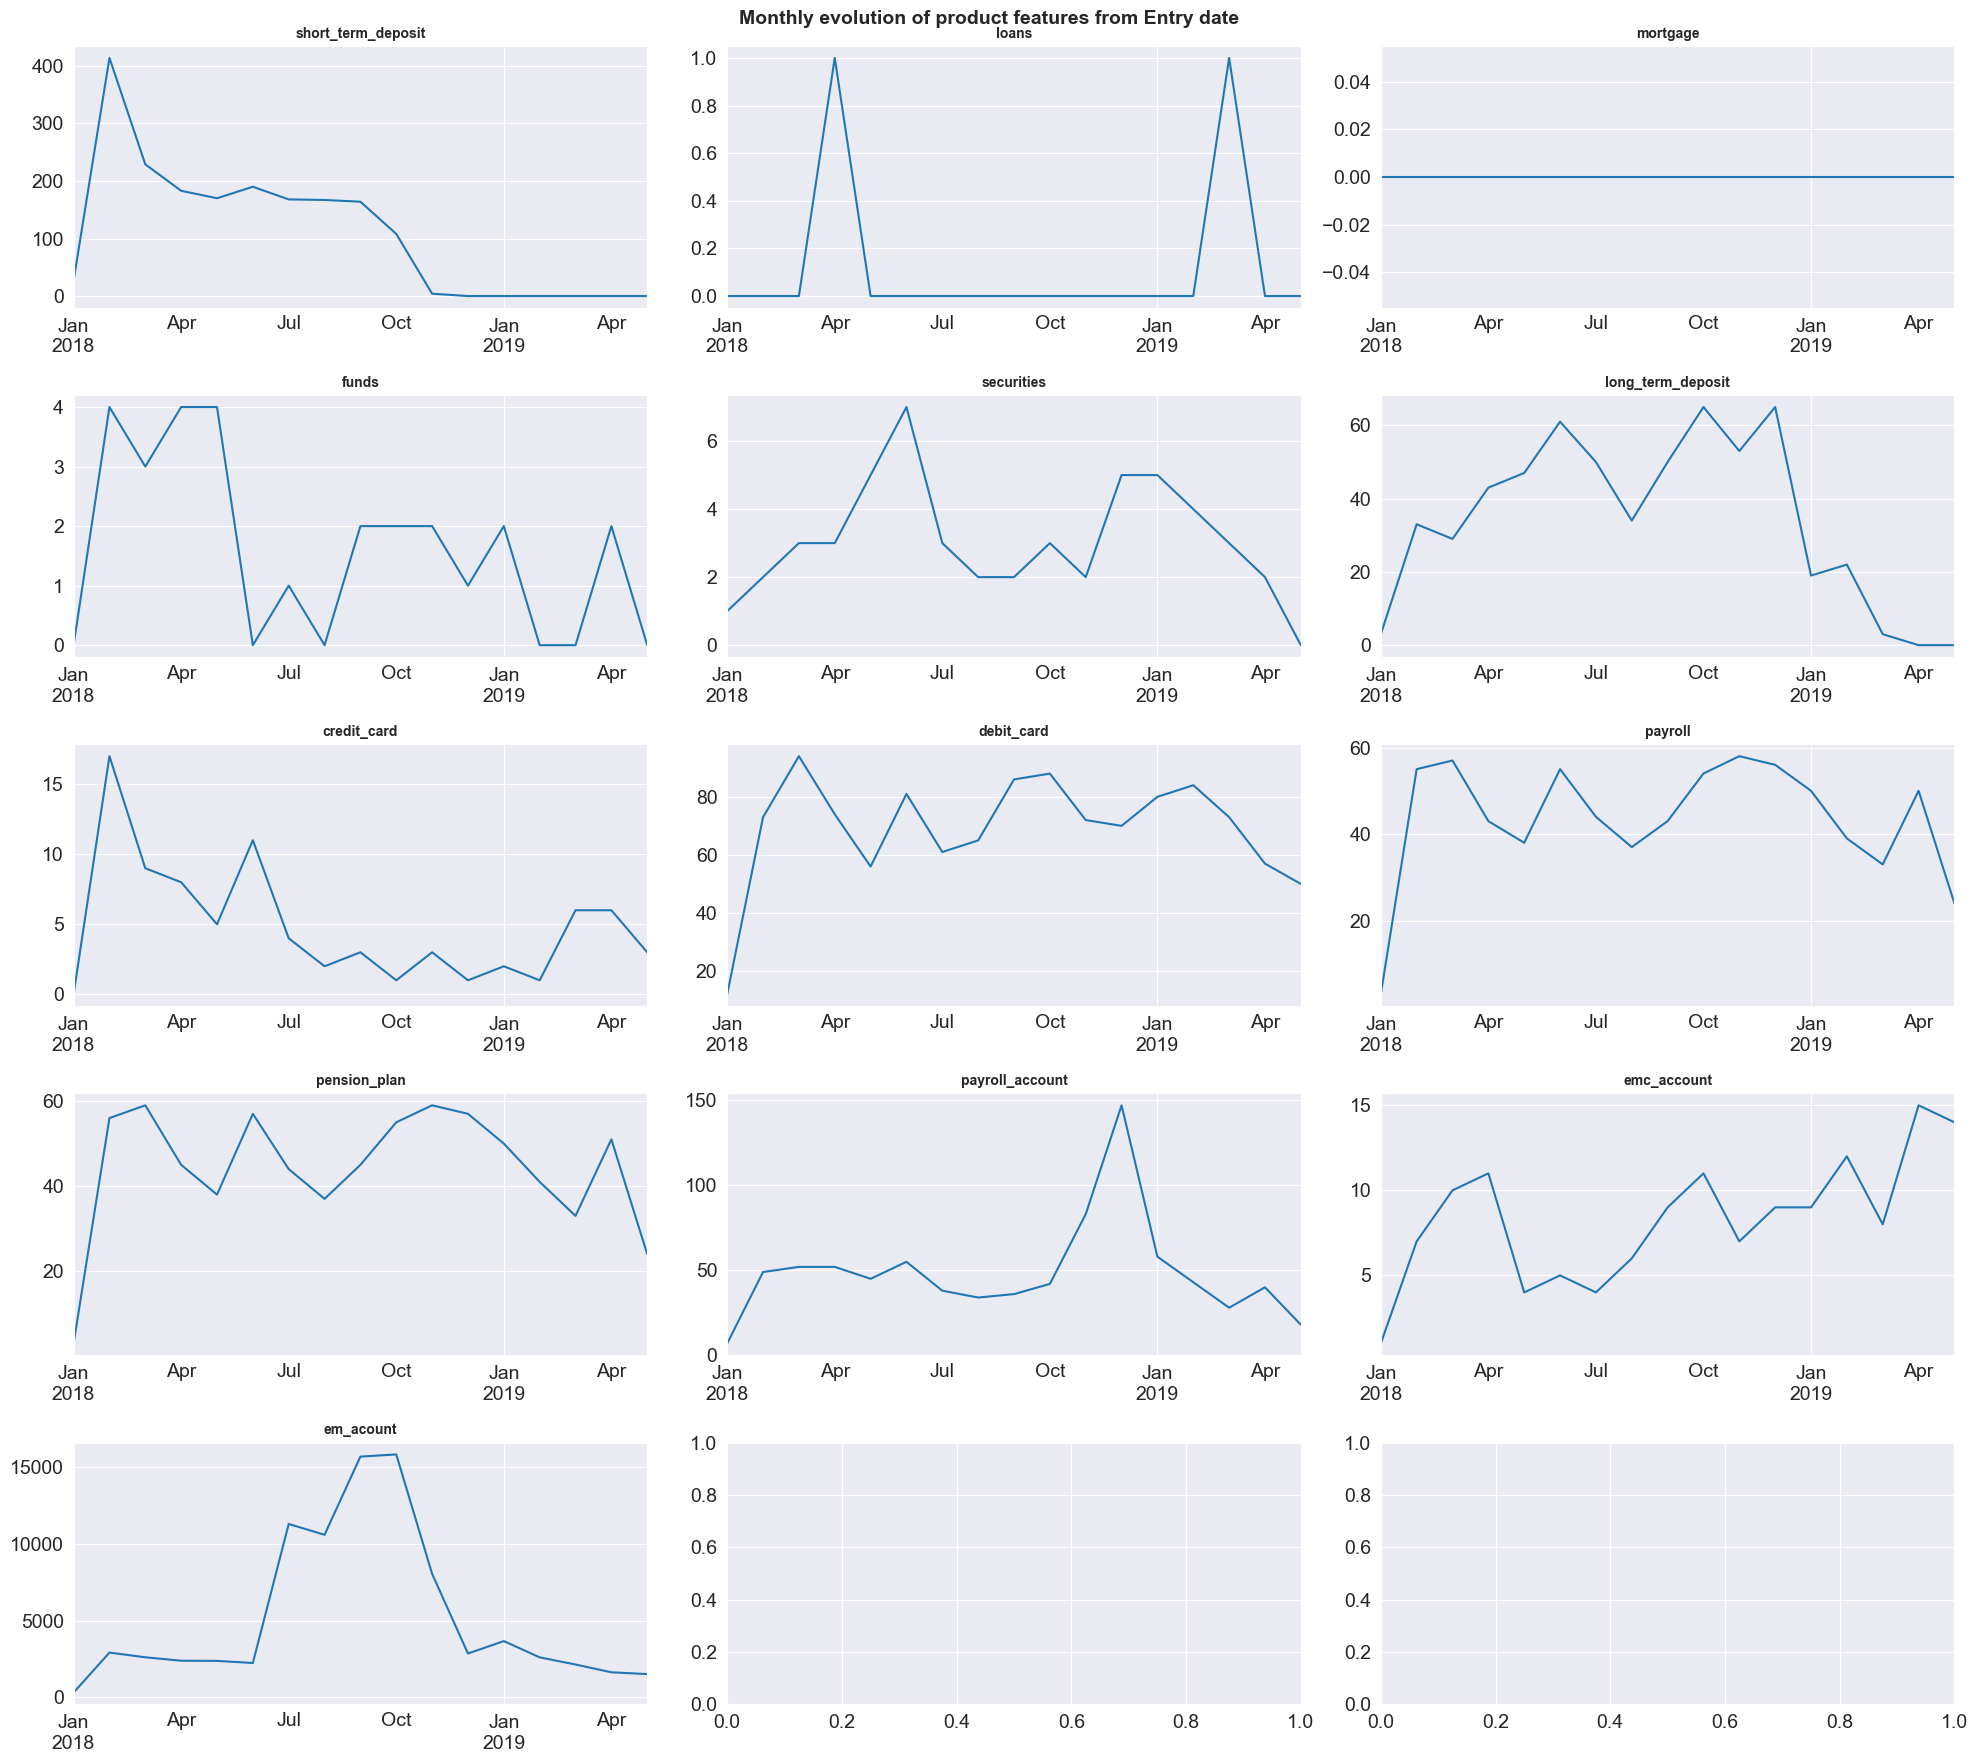

In [476]:
plt.rcParams.update({'font.size': 14})
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(20,18)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    check_dates_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features from Entry date', fontsize = 14, fontweight = 'bold')

The following trends can be identified:
- Short term deposit: the new registries decay over time, together with the retention lost in the already sold units indicates that this product is doing really bad.
- Loans: two sales in 1.5 year. Is the revenue worth keeping with such a low numbers?
- Mortgage: no sales in 1.5 year, retention is good but what's the revenue that the cost-benefit ration out of it?
- Funds and securities: very low numbers. Same question as for the products above.
- Payroll account:  The only reason that comes to mind, for having such a spike in December 2019, is that this is awarded to older accounts and has no relation with new purchases of payroll.
- EM account: Usual seasonal increase of users, it confirms that the change in entry channel used worked.
- Other products: The number of customers that purchase the other prodcuts vary but in general are low compared to the best performing products.

In summary it can be confirmed what has been seen already during the analysis, EM account is teh best performing product and the bulk of users comes in seasons. The rest of the products have low numbers in comparison but most of them seem to have a somewha steady acquisition rate over the year. What should be analyzed in more detail is whether products with zero or very low sales are worth keeping in the portfolio of the company.

### **2019-05: Number of Products Distribution**

In [104]:
count_per_total_products_2019 = df_2019_05["Total_products"].value_counts().to_frame().reset_index()
count_per_total_products_2019.columns = ["nr_products", "nr_customers"]
count_per_total_products_2019.sort_values("nr_products", ascending = True, inplace = True)
count_per_total_products_2019["pct_over_total"] = count_per_total_products_2019["nr_customers"]/count_per_total_products_2019["nr_customers"].sum()
count_per_total_products_2019.head()

nr_products  nr_customers  pct_over_total
1       0          111382          0.25     
0       1          268255          0.61     
2       2           38691          0.09     
3       3           11496          0.03     
4       4            8478          0.02

Overall, the table provides a useful summary of the distribution of products among customers and can help identify potential opportunities for cross-selling or targeting specific customer groups. For example, the bank may want to focus on increasing the number of products held by customers who currently only have 1 product, as they represent a significant portion of the customer base.

### **2019-05: Number of Products Distribution -  Not active customers**

In [105]:
df_2019_05_Not_Active=df_2019_05[df_2019_05['active_customer']==0]

In [106]:
count_per_total_products_2019_NA = df_2019_05_Not_Active["Total_products"].value_counts().to_frame().reset_index()
count_per_total_products_2019_NA.columns = ["nr_products", "nr_customers"]
count_per_total_products_2019_NA.sort_values("nr_products", ascending = True, inplace = True)
count_per_total_products_2019_NA["pct_over_total"] = count_per_total_products_2019_NA["nr_customers"]/count_per_total_products_2019_NA["nr_customers"].sum()
count_per_total_products_2019_NA.head()

nr_products  nr_customers  pct_over_total
1       0          106502          0.39     
0       1          164040          0.60     
2       2             829          0.00     
3       3              23          0.00     
4       4               1          0.00

The majority (60%) of non-active customers have only one product.
39% of non-active customers do not have any products at all.
A very small percentage of non-active customers have 2, 3, or 4 products.
The percentage of non-active customers with more than one product is significantly lower than the percentage of active customers with more than one product, suggesting that having multiple products is a strong indicator of customer engagement and activity.

### **Check by Region what is the ratio between salary vs age**

In [107]:
x_y_size = {"salary": "mean", "age": "mean", "active_customer": "sum"}
four_feature_scatterer(df, "region_code", x_y_size)

## Madrid: Most active customers, highest salaries, ages 33, salary average above 150k
## Barcelona follows closely
## Rest of active customers we can find majorly between 50 and 120k salary and 26-30 years old

In [108]:
x_y_size = {"salary": "mean", "age": "mean", "Total_products": "sum"}
four_feature_scatterer(df, "region_code", x_y_size, subset = ["active_customer", 1])

### Age vs Binaries

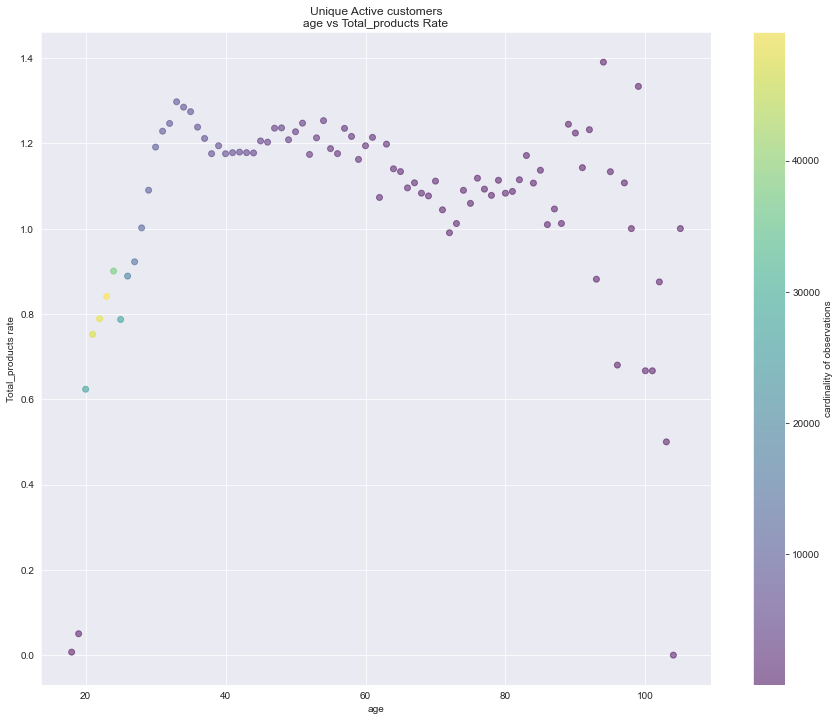

In [109]:
feature_vs_target_w_lengh(df, "age", "Total_products")

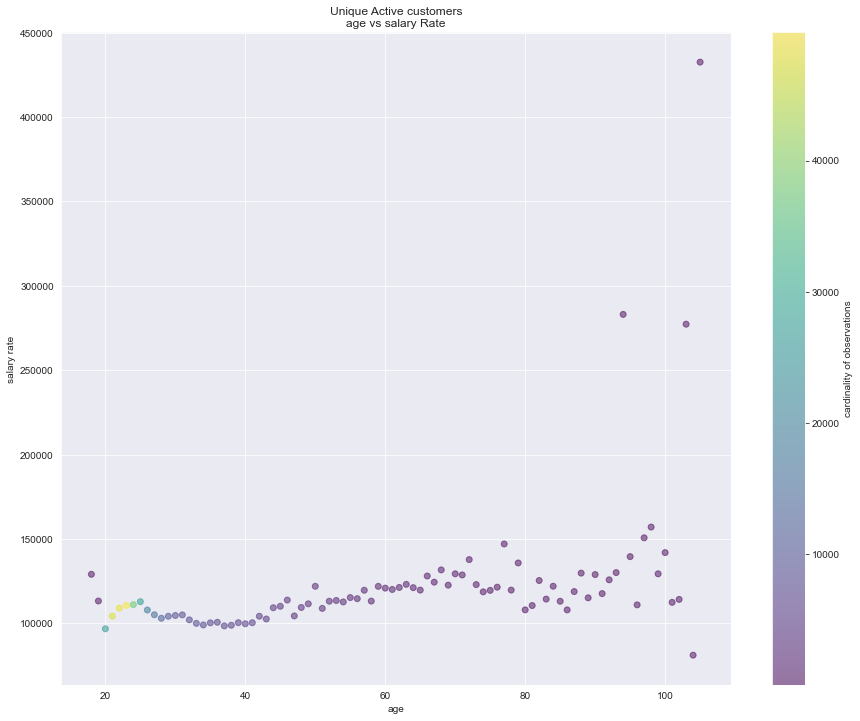

In [110]:
feature_vs_target_w_lengh(df, "age", "salary")

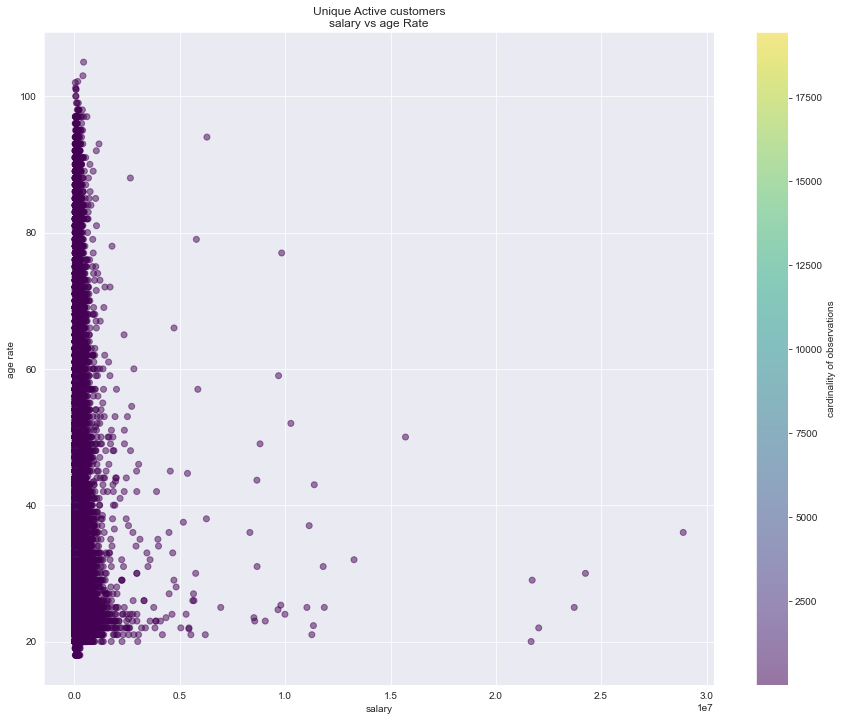

In [111]:
feature_vs_target_w_lengh(df, "salary", "age")

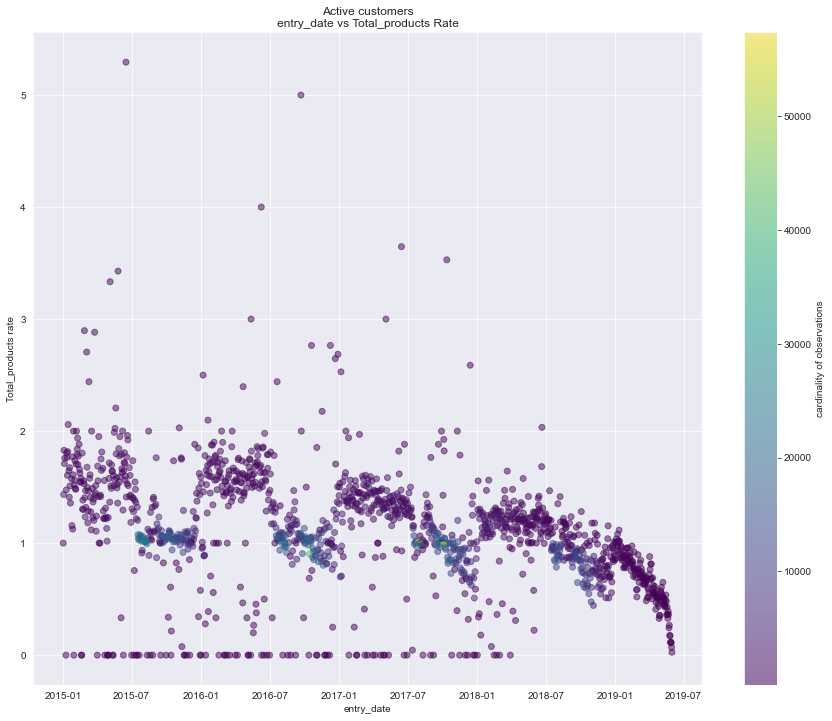

In [112]:
feature_vs_target_w_lengh(df, "entry_date", "Total_products", grouped = False)